## customer conversion-prediction
### 1. Import Necessary Libraries

To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library.  This will also improve the reproducibility of our project.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
## import dataset

In [6]:
data=pd.read_csv(r"C:\Users\shali\Desktop\FINAL PROJECT\classification_data.csv")
data

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,geoNetwork_latitude,...,latest_keyword,earliest_isTrueDirect,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted,target_date
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,25.3463,...,(not set),True,True,1900,0,5617,0,food////food////food,0,2021-01-01
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,25.4052,...,(automatic matching),True,True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1,2021-01-01
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,24.4539,...,custom0==marketplace&+id==*,True,True,592,0,1576,0,food////food,0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99996,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99997,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01
99998,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,25.2048,...,custom0==marketplace&+id==*,True,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1,2021-01-01


In [7]:
## EDA PROCESS (Exploratory data analysis)

In [8]:
data.dtypes

count_session               int64
count_hit                   int64
channelGrouping            object
totals_newVisits            int64
device_browser             object
device_operatingSystem     object
device_isMobile              bool
device_deviceCategory      object
geoNetwork_region          object
geoNetwork_latitude       float64
geoNetwork_longitude      float64
historic_session            int64
historic_session_page       int64
youtube                     int64
avg_session_time          float64
avg_session_time_page     float64
single_page_rate          float64
sessionQualityDim           int64
last_visitId                int64
latest_visit_id             int64
visitId_threshold           int64
earliest_visit_id           int64
earliest_visit_number       int64
latest_visit_number         int64
time_earliest_visit       float64
time_latest_visit         float64
avg_visit_time              int64
days_since_last_visit       int64
days_since_first_visit      int64
visits_per_day

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   count_session           100000 non-null  int64  
 1   count_hit               100000 non-null  int64  
 2   channelGrouping         100000 non-null  object 
 3   totals_newVisits        100000 non-null  int64  
 4   device_browser          100000 non-null  object 
 5   device_operatingSystem  100000 non-null  object 
 6   device_isMobile         100000 non-null  bool   
 7   device_deviceCategory   100000 non-null  object 
 8   geoNetwork_region       100000 non-null  object 
 9   geoNetwork_latitude     100000 non-null  float64
 10  geoNetwork_longitude    100000 non-null  float64
 11  historic_session        100000 non-null  int64  
 12  historic_session_page   100000 non-null  int64  
 13  youtube                 100000 non-null  int64  
 14  avg_session_time     

In [10]:
data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'historic_session', 'historic_session_page',
       'youtube', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'last_visitId',
       'latest_visit_id', 'visitId_threshold', 'earliest_visit_id',
       'earliest_visit_number', 'latest_visit_number', 'time_earliest_visit',
       'time_latest_visit', 'avg_visit_time', 'days_since_last_visit',
       'days_since_first_visit', 'visits_per_day', 'bounce_rate',
       'earliest_source', 'latest_source', 'earliest_medium', 'latest_medium',
       'earliest_keyword', 'latest_keyword', 'earliest_isTrueDirect',
       'latest_isTrueDirect', 'num_interactions', 'bounces', 'time_on_site',
       'transactionRevenue', 'products_array', 'has_converted', 't

In [11]:
##FINDING MISSSING VALUES
data.isna().sum()

count_session             0
count_hit                 0
channelGrouping           0
totals_newVisits          0
device_browser            0
device_operatingSystem    0
device_isMobile           0
device_deviceCategory     0
geoNetwork_region         0
geoNetwork_latitude       0
geoNetwork_longitude      0
historic_session          0
historic_session_page     0
youtube                   0
avg_session_time          0
avg_session_time_page     0
single_page_rate          0
sessionQualityDim         0
last_visitId              0
latest_visit_id           0
visitId_threshold         0
earliest_visit_id         0
earliest_visit_number     0
latest_visit_number       0
time_earliest_visit       0
time_latest_visit         0
avg_visit_time            0
days_since_last_visit     0
days_since_first_visit    0
visits_per_day            0
bounce_rate               0
earliest_source           0
latest_source             0
earliest_medium           0
latest_medium             0
earliest_keyword    

In [12]:
data.shape

(100000, 46)

In [13]:
data.nunique()

count_session              157
count_hit                 4506
channelGrouping              3
totals_newVisits             2
device_browser               9
device_operatingSystem       7
device_isMobile              2
device_deviceCategory        3
geoNetwork_region           91
geoNetwork_latitude        104
geoNetwork_longitude       104
historic_session          6979
historic_session_page     3066
youtube                      1
avg_session_time          8279
avg_session_time_page     3698
single_page_rate           493
sessionQualityDim           67
last_visitId              9093
latest_visit_id           9093
visitId_threshold         9093
earliest_visit_id         9160
earliest_visit_number      528
latest_visit_number        694
time_earliest_visit       1360
time_latest_visit         1356
avg_visit_time              24
days_since_last_visit        1
days_since_first_visit      31
visits_per_day            7794
bounce_rate                 92
earliest_source             36
latest_s

In [14]:
## finding target varriable (has_converted)precentage rate

In [15]:
data["has_converted"].value_counts()

has_converted
1    51727
0    48273
Name: count, dtype: int64

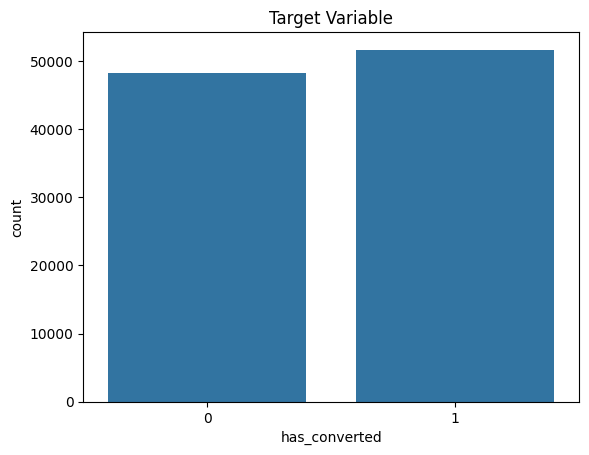

In [16]:
sns.countplot(x="has_converted", data=data)
plt.title("Target Variable")
plt.show()

In [17]:
print("percentage of not converted and converted\n",data["has_converted"].value_counts()/len(data)*100)

percentage of not converted and converted
 has_converted
1    51.727
0    48.273
Name: count, dtype: float64


In [18]:
# basic analaysis i will drop some colums 

In [19]:
column_to_drop = ["geoNetwork_latitude","geoNetwork_longitude","last_visitId","visitId_threshold","earliest_visit_id","earliest_visit_number","youtube", 'time_earliest_visit','days_since_last_visit','days_since_first_visit','earliest_source','earliest_medium','earliest_keyword','earliest_isTrueDirect','target_date',]
data.drop(column_to_drop, axis=1, inplace=True)

In [20]:
data.shape

(100000, 31)

In [21]:
data

,count_session,count_hit,channelGrouping,totals_newVisits,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,historic_session,...,latest_source,latest_medium,latest_keyword,latest_isTrueDirect,num_interactions,bounces,time_on_site,transactionRevenue,products_array,has_converted
0,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,6504,...,gulfnews,app,(not set),True,1900,0,5617,0,food////food////food,0
1,9,1194,(Other),0,GoogleAnalytics,Android,True,mobile,Sharjah,6504,...,gulfnews,app,(not set),True,1900,0,5617,0,food////food////food,0
2,28,1816,Paid Search,0,GoogleAnalytics,Android,True,mobile,Ajman,12466,...,google,cpc,(automatic matching),True,3843,0,77417,1477195214,"(not set)////baby_products--milk,_food_&_juice...",1
3,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,1575,...,google,cpc,custom0==marketplace&+id==*,True,592,0,1576,0,food////food,0
4,2,299,Paid Search,0,GoogleAnalytics,Android,True,mobile,Abu Dhabi,1575,...,google,cpc,custom0==marketplace&+id==*,True,592,0,1576,0,food////food,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,28082,...,google,cpc,custom0==marketplace&+id==*,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1
99996,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,28082,...,google,cpc,custom0==marketplace&+id==*,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1
99997,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,28082,...,google,cpc,custom0==marketplace&+id==*,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1
99998,58,12340,Paid Search,0,GoogleAnalytics,iOS,True,mobile,Dubai,28082,...,google,cpc,custom0==marketplace&+id==*,True,34999,0,0,149151662,"baby_products--milk,_food_&_juices--baby_&_tod...",1


In [22]:
data.columns

Index(['count_session', 'count_hit', 'channelGrouping', 'totals_newVisits',
       'device_browser', 'device_operatingSystem', 'device_isMobile',
       'device_deviceCategory', 'geoNetwork_region', 'historic_session',
       'historic_session_page', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'latest_visit_id',
       'latest_visit_number', 'time_latest_visit', 'avg_visit_time',
       'visits_per_day', 'bounce_rate', 'latest_source', 'latest_medium',
       'latest_keyword', 'latest_isTrueDirect', 'num_interactions', 'bounces',
       'time_on_site', 'transactionRevenue', 'products_array',
       'has_converted'],
      dtype='object')

In [23]:
#finding skewness

In [24]:
#dividing catagorical data and numeric data
data_cat=data.select_dtypes(object)

In [25]:
data_num=data.select_dtypes(["int64","float64"])

In [26]:
#skewness

In [27]:
def plot(data, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

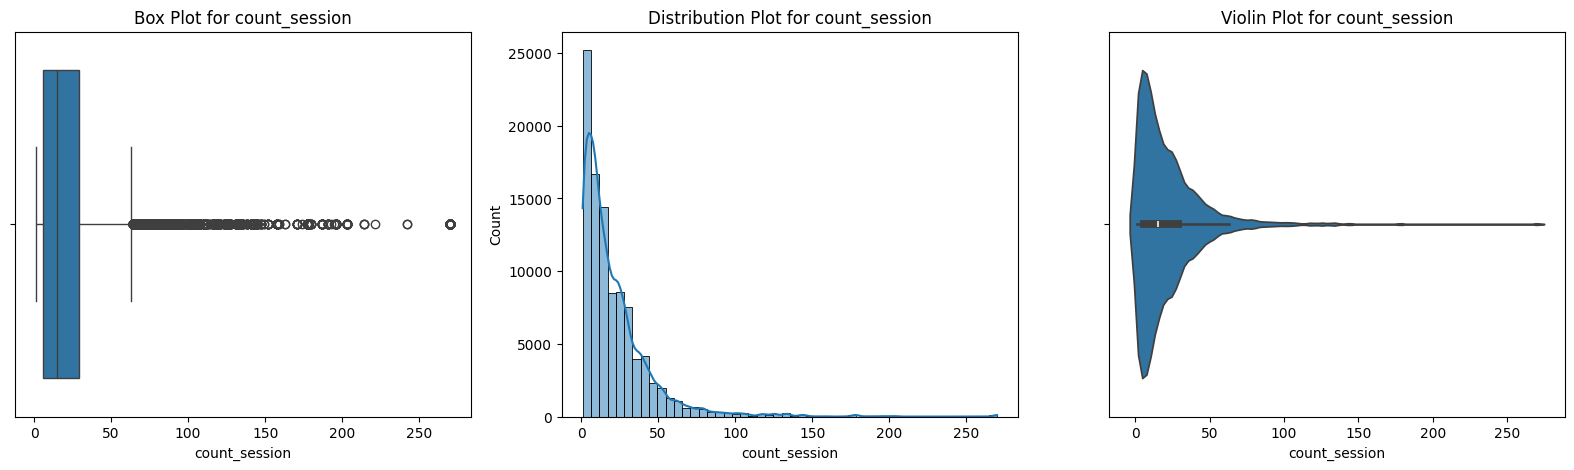

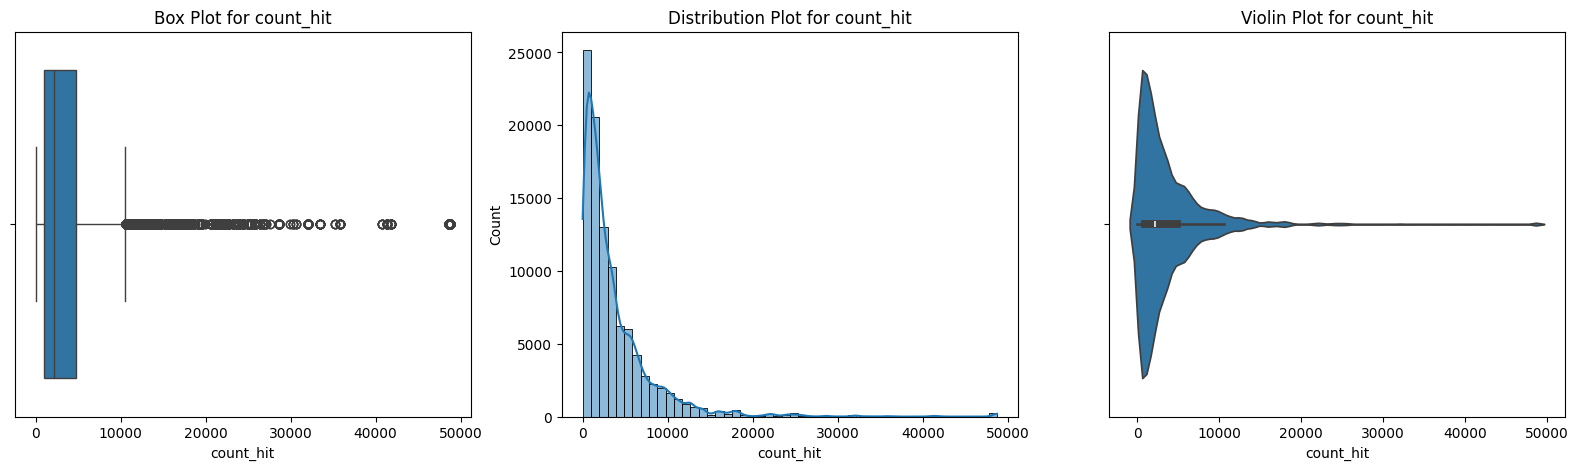

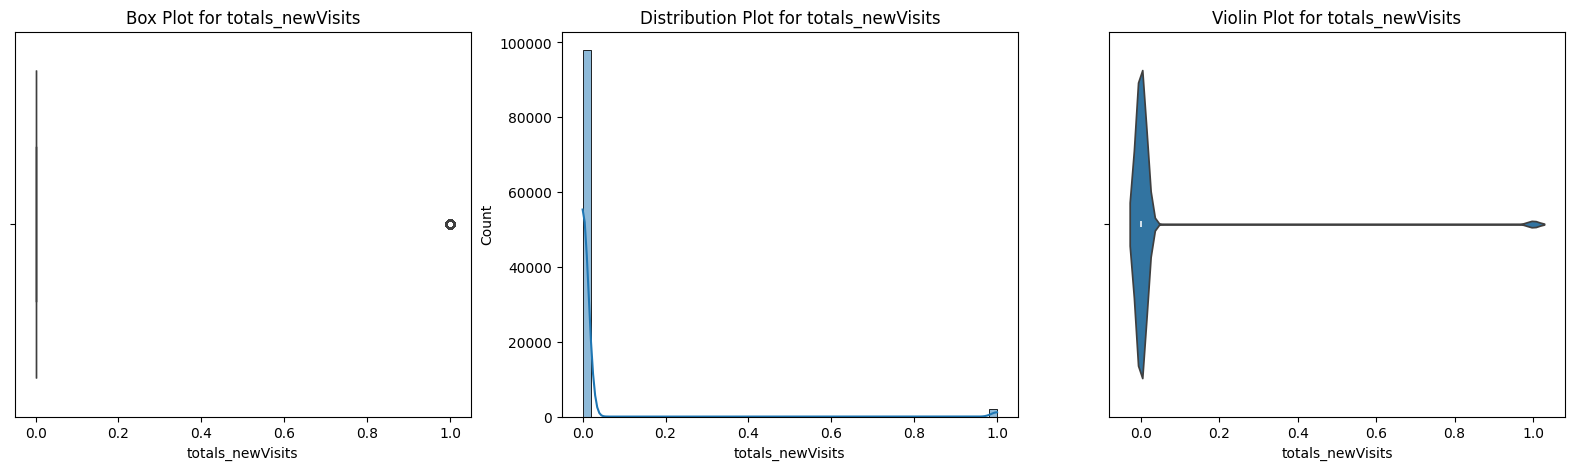

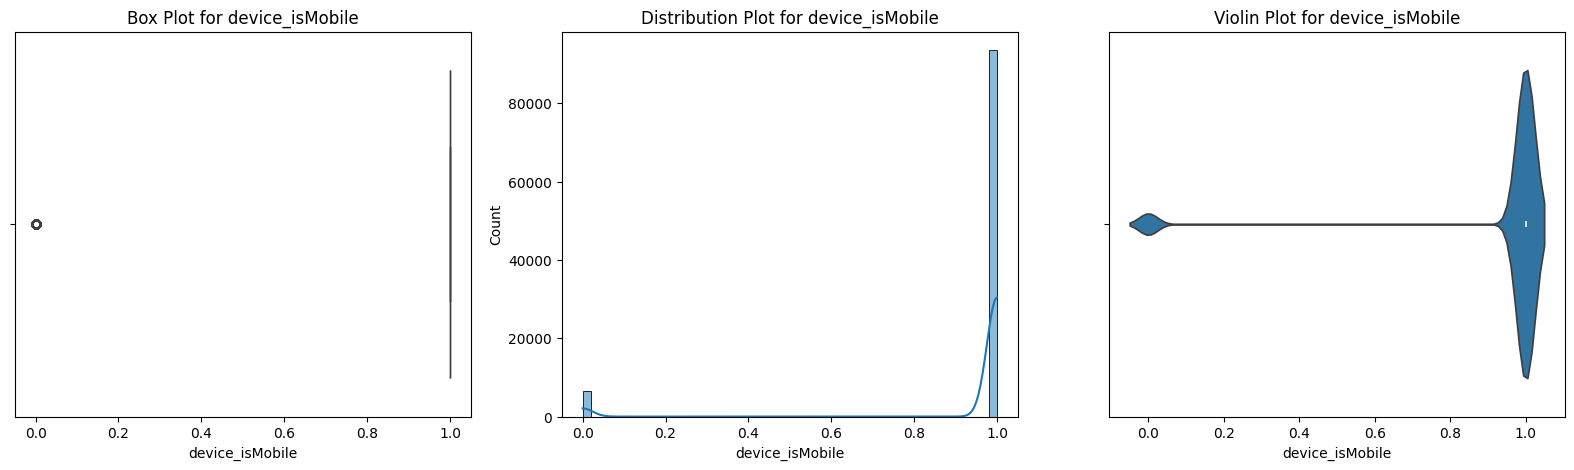

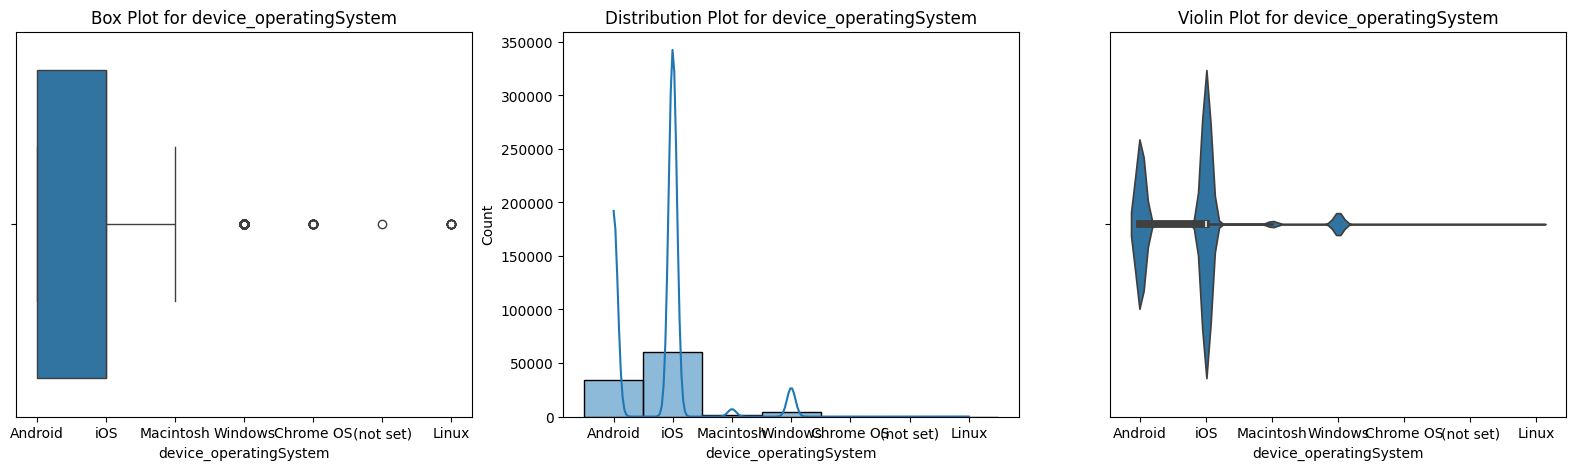

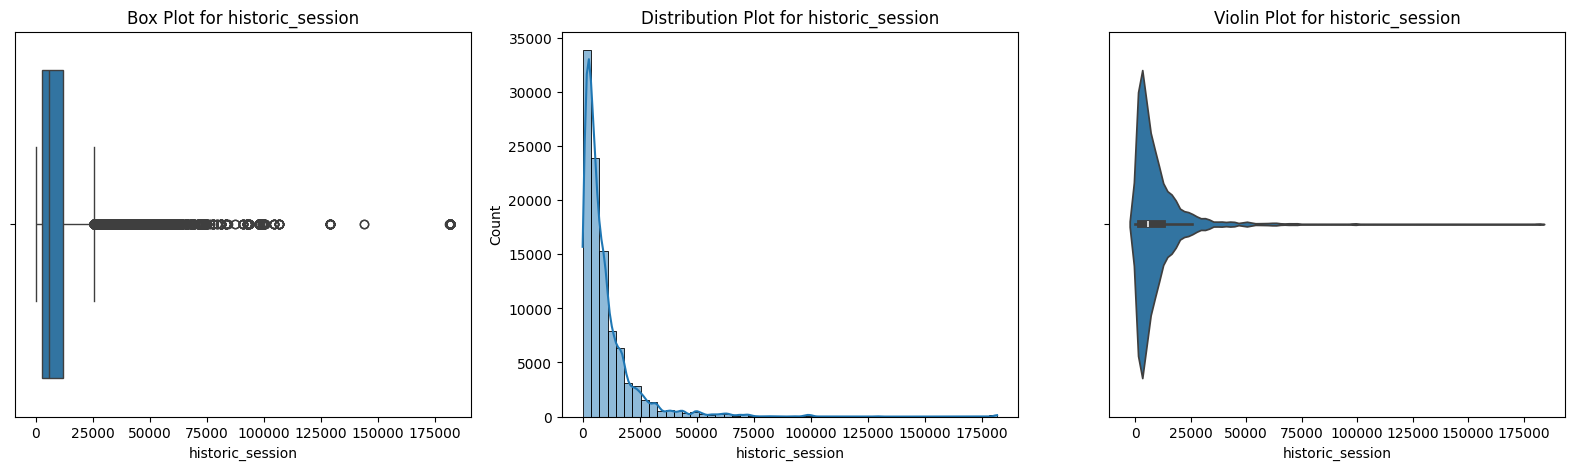

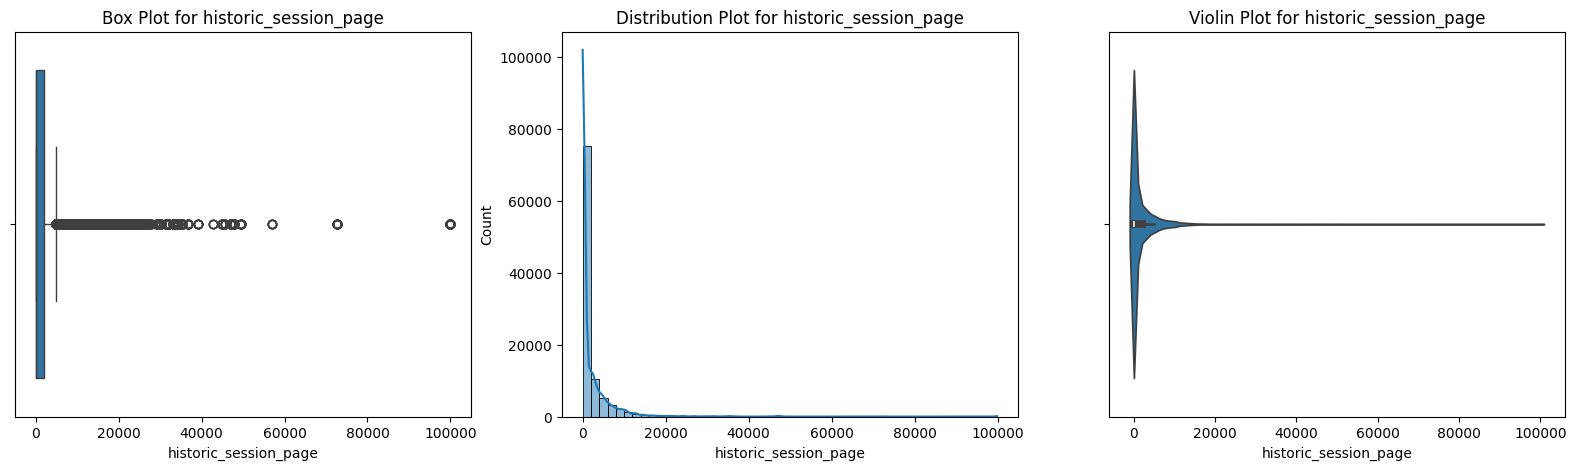

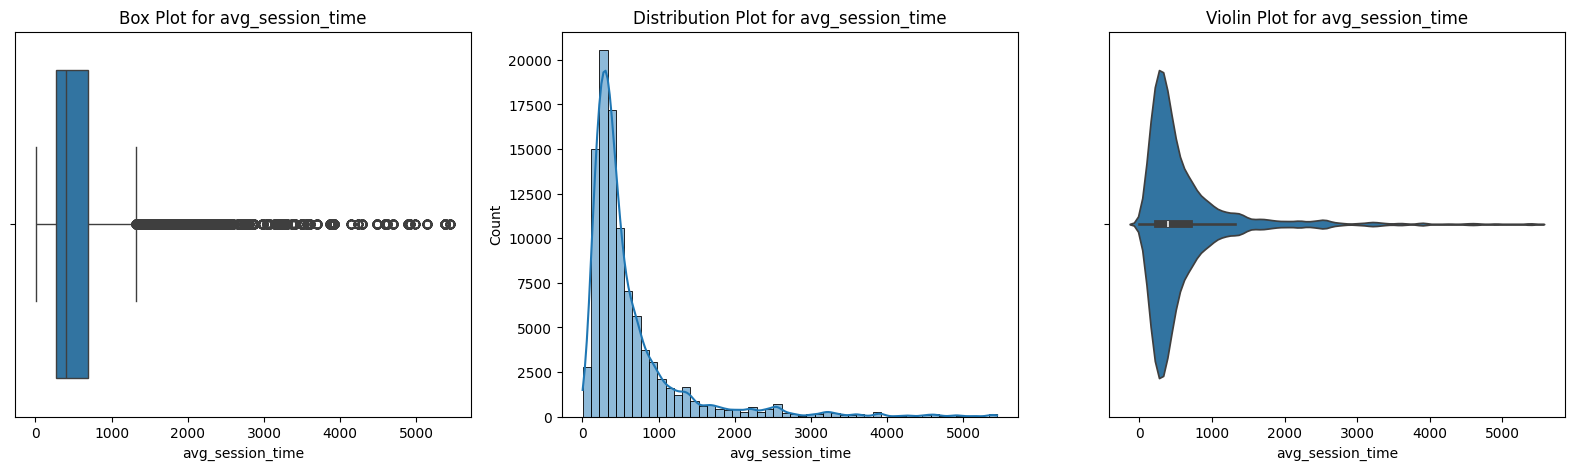

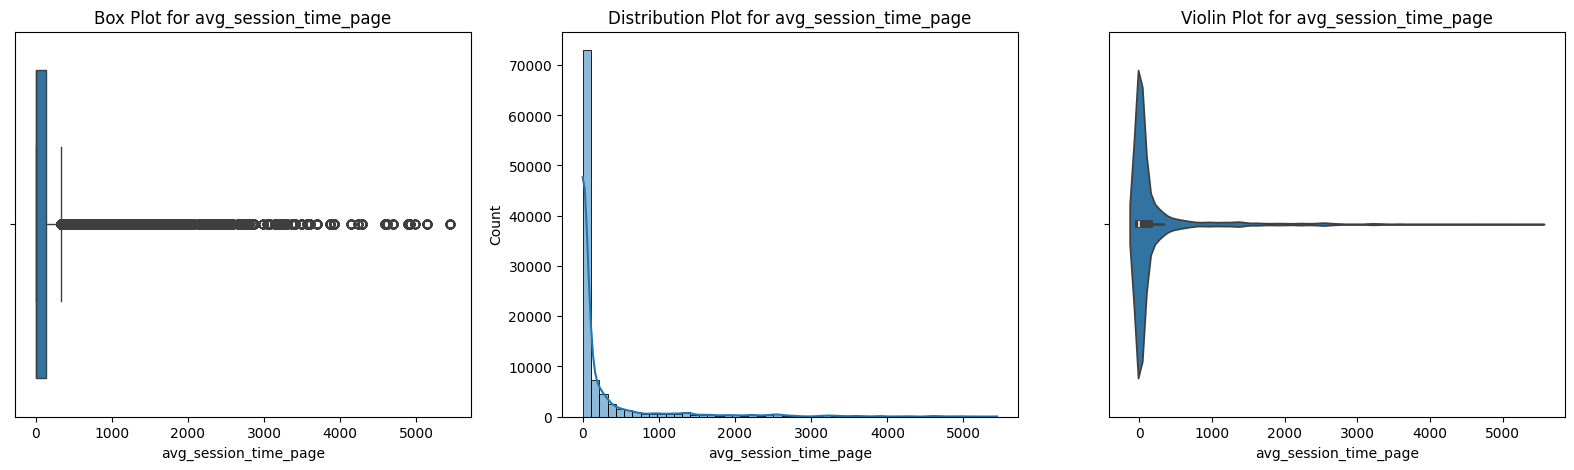

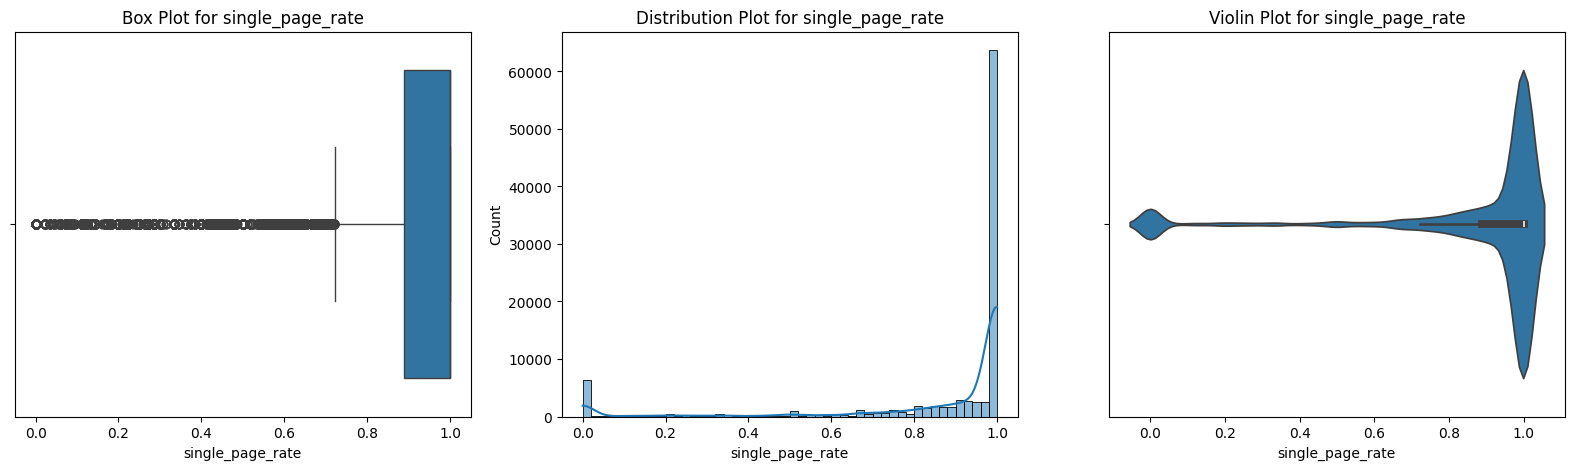

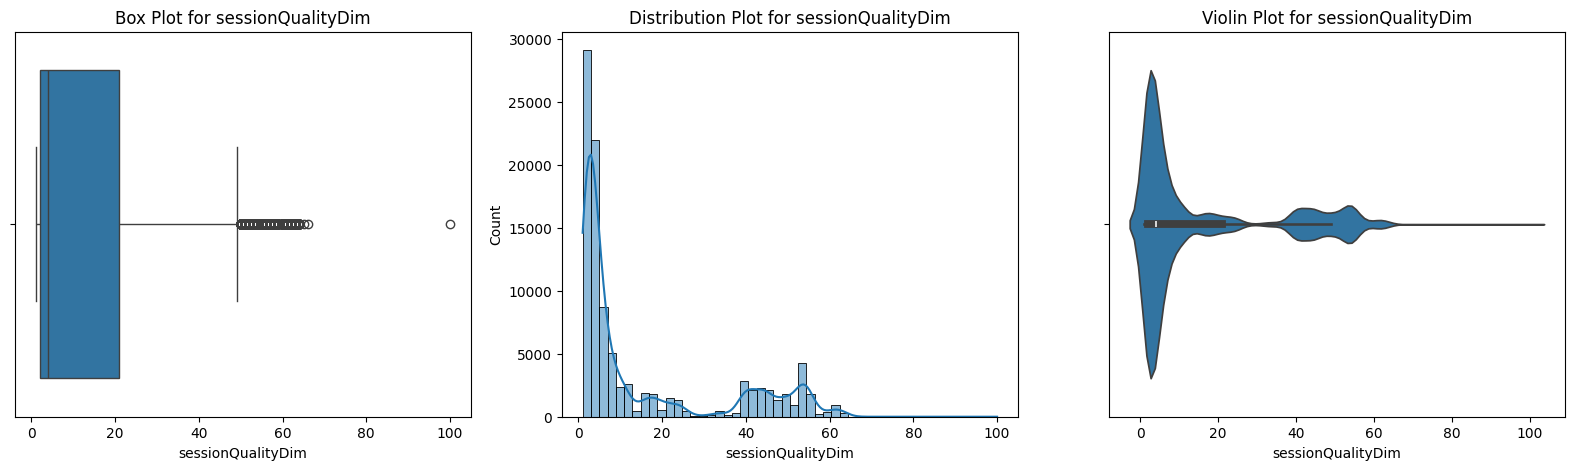

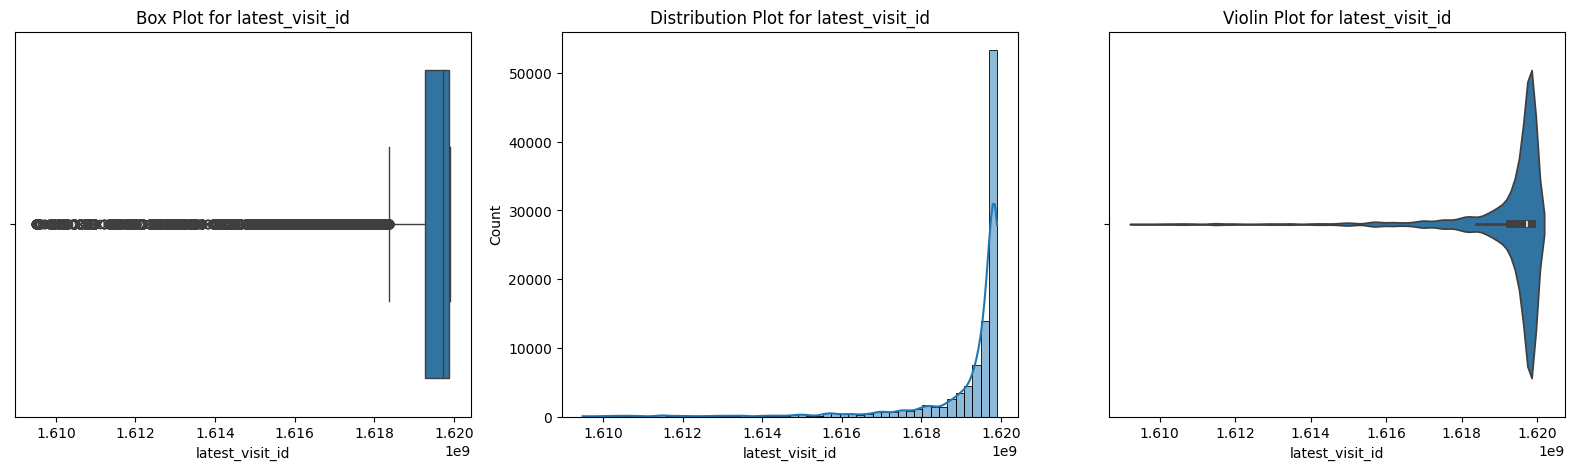

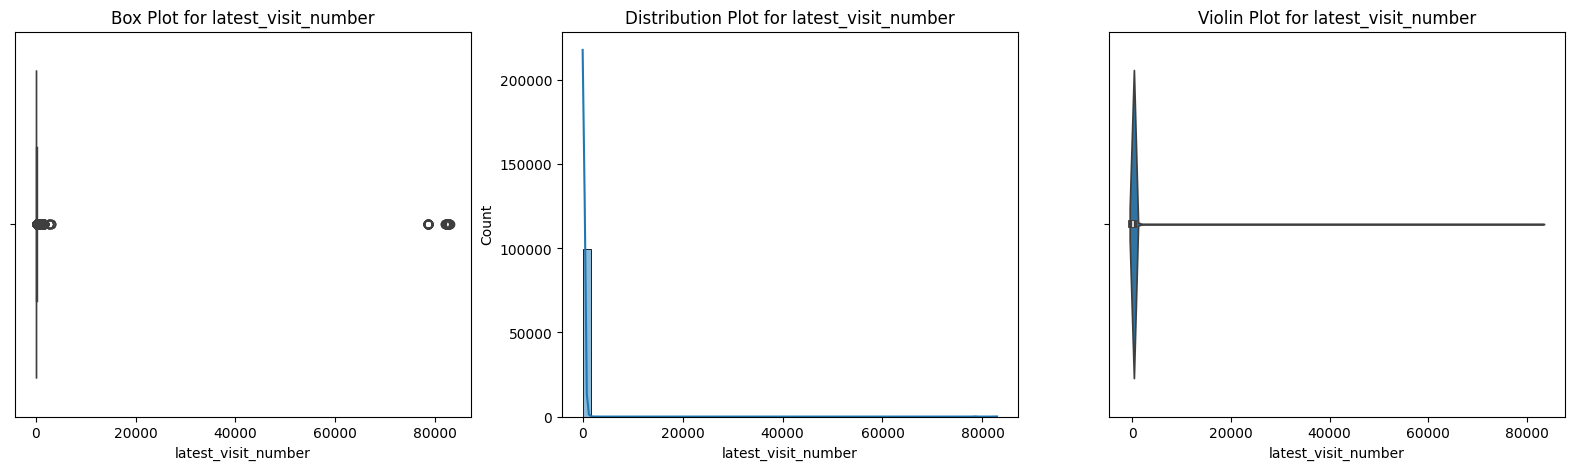

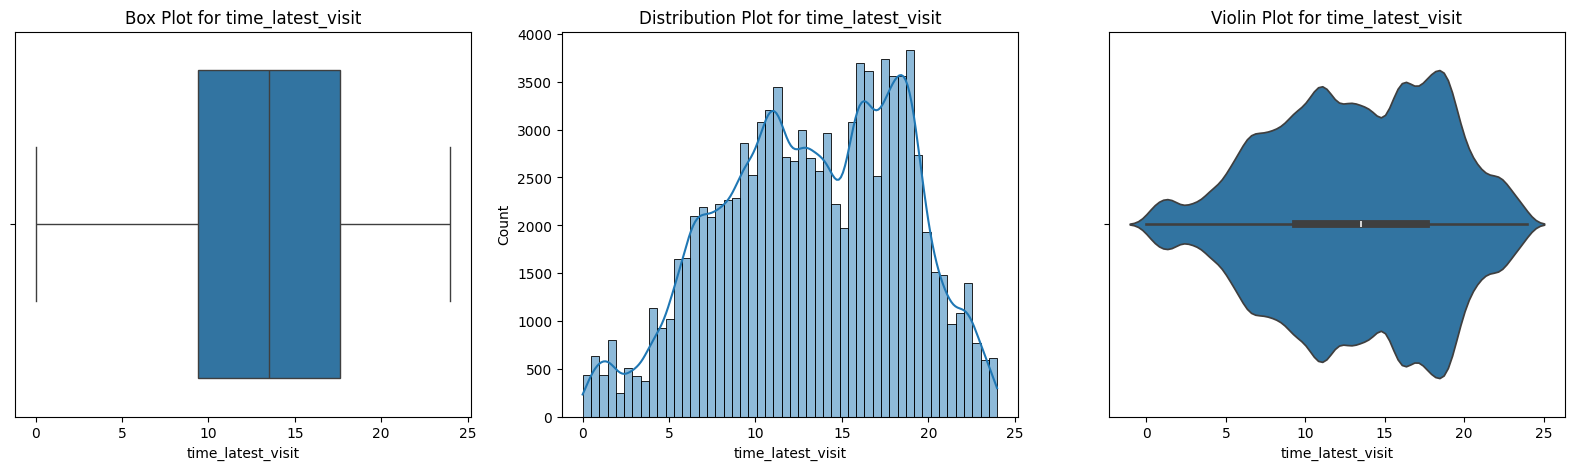

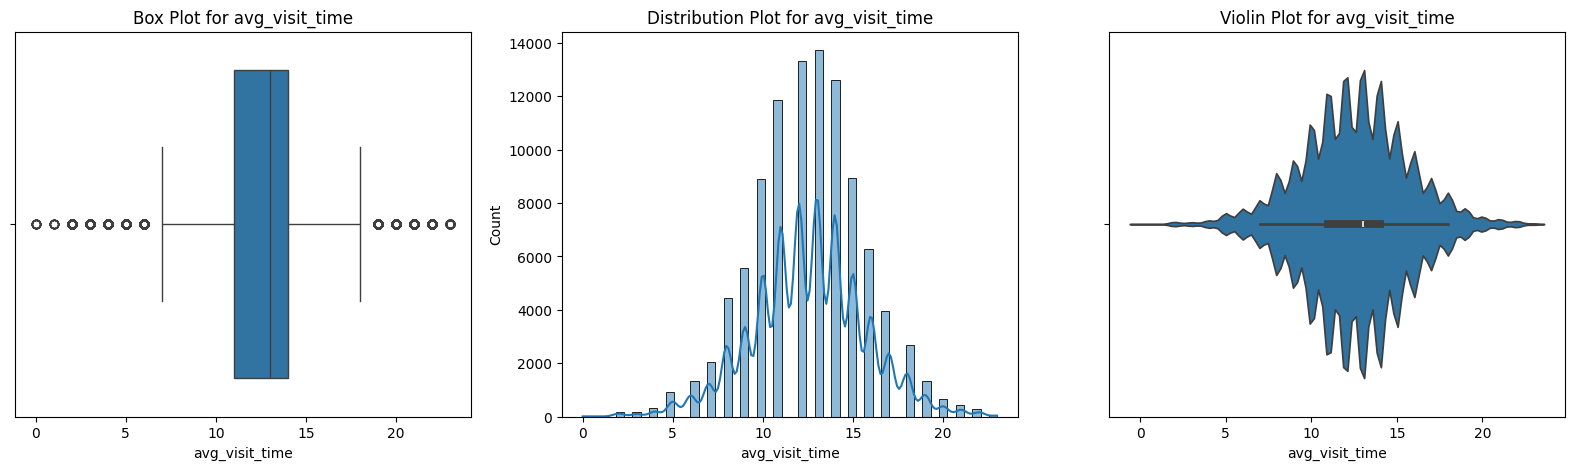

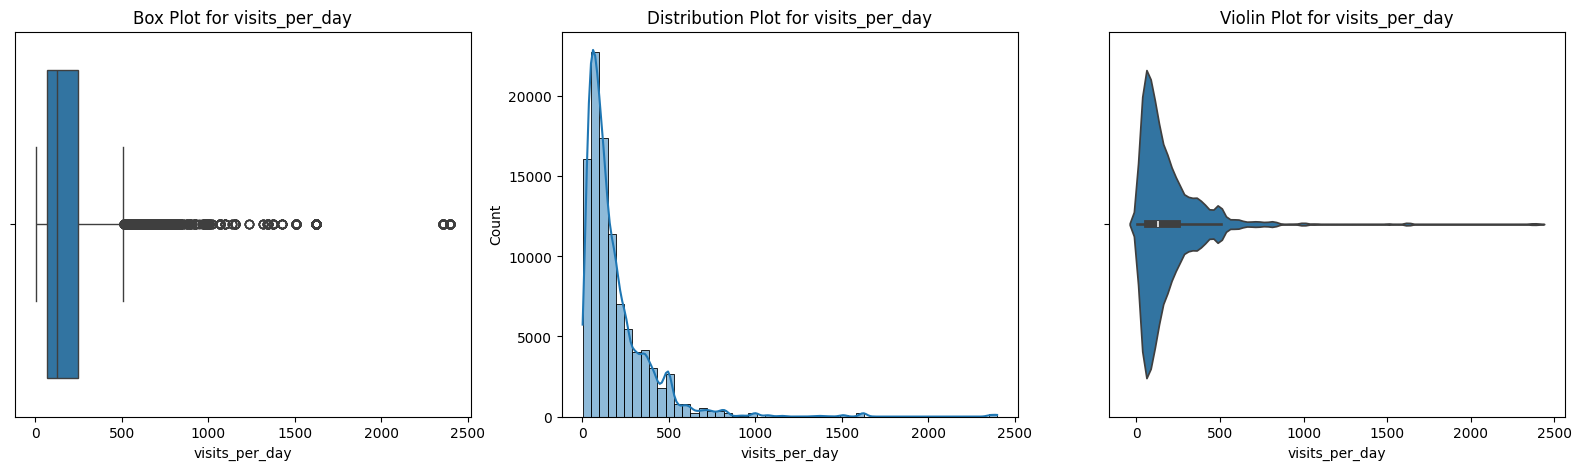

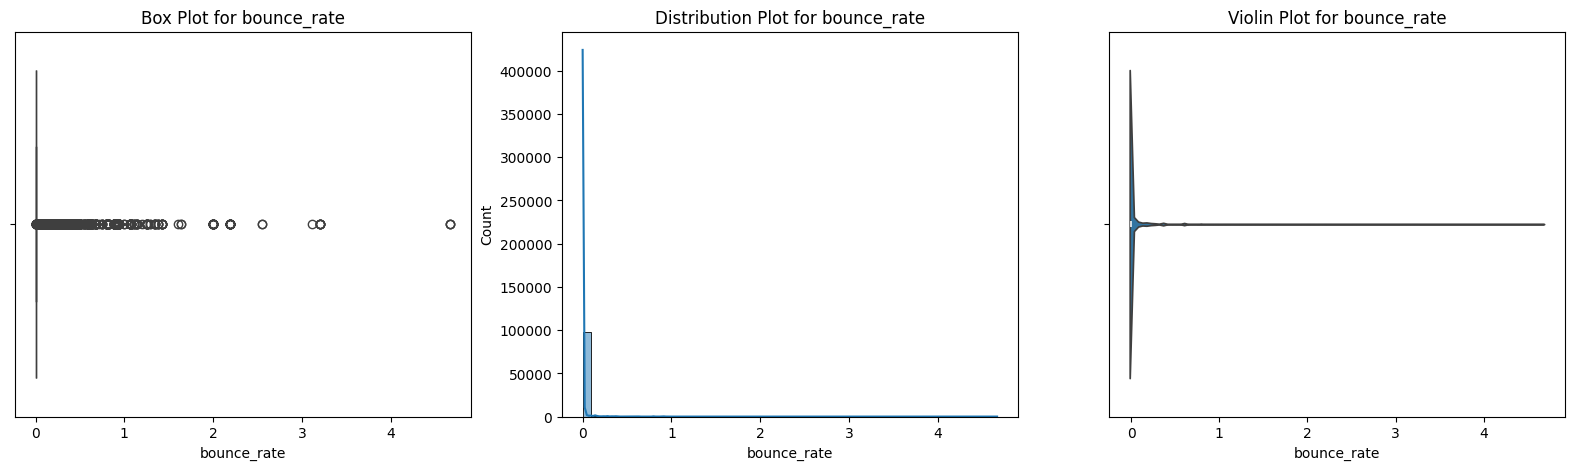

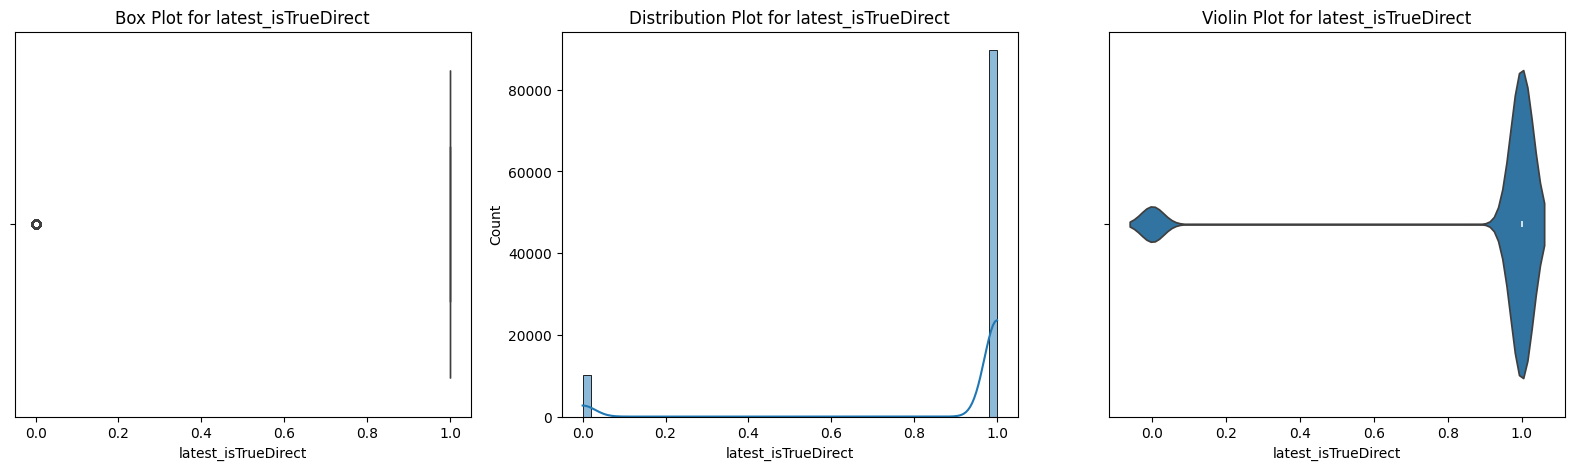

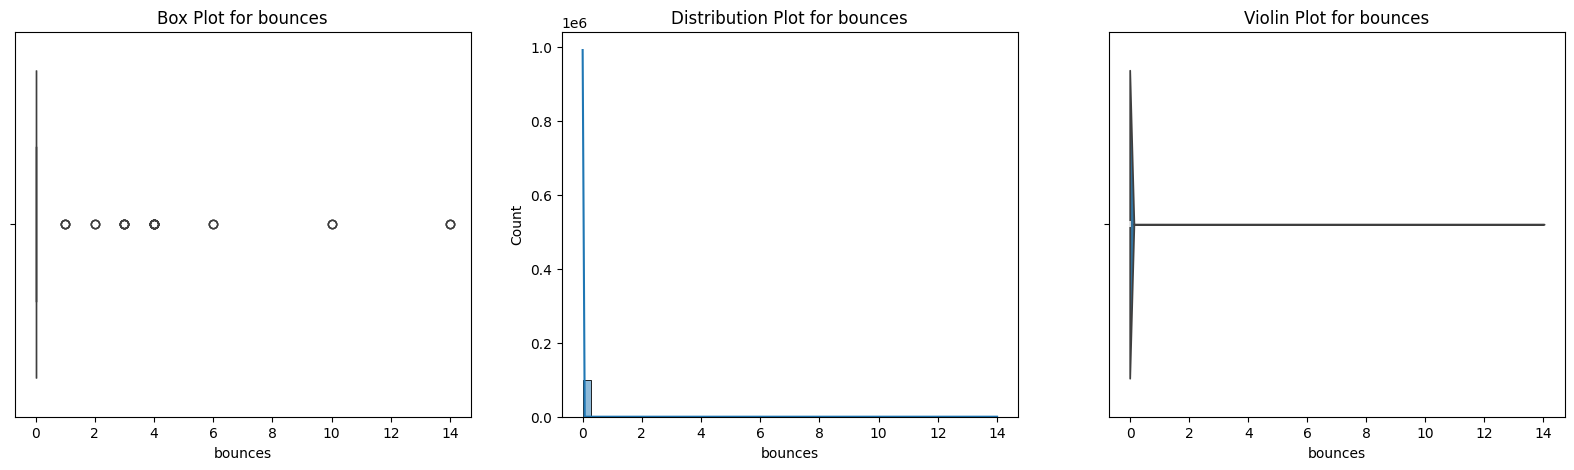

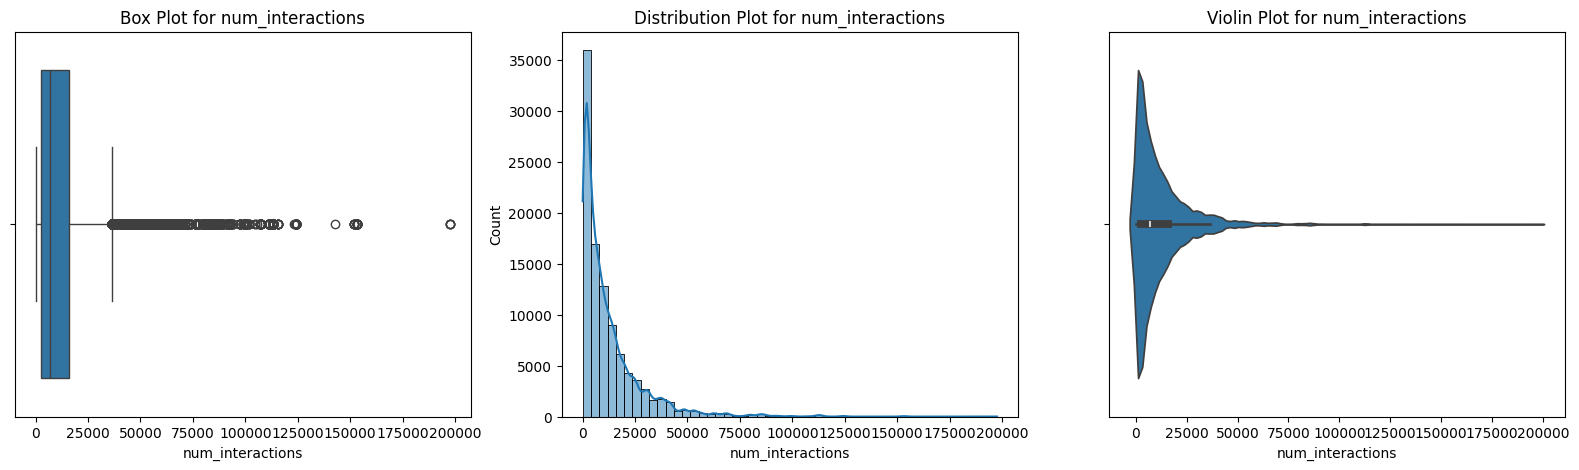

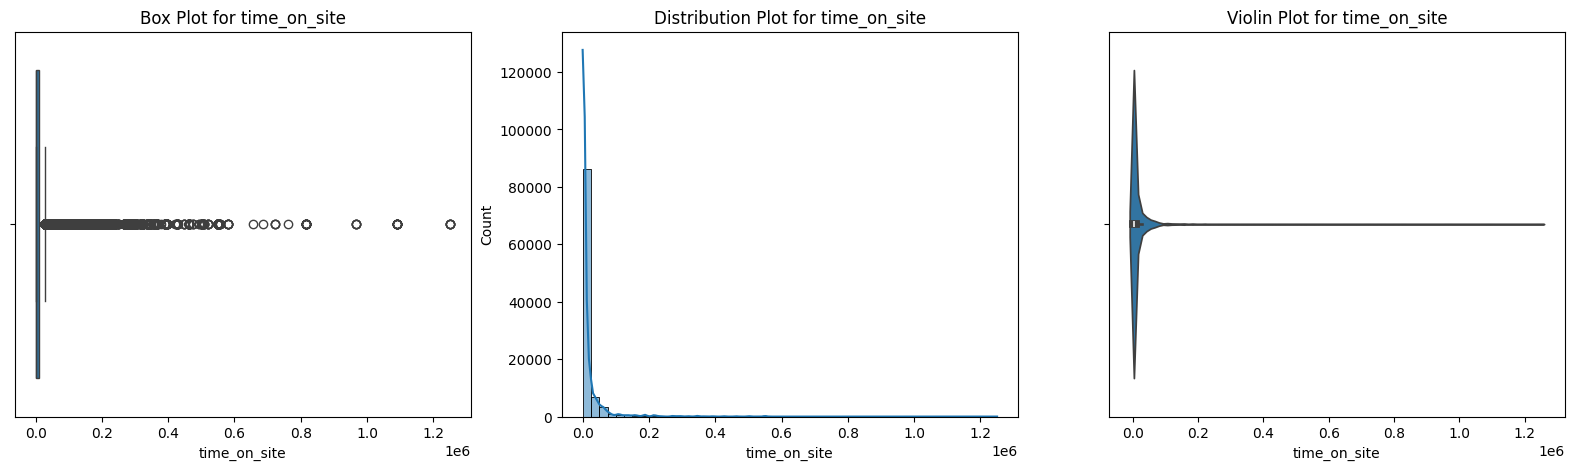

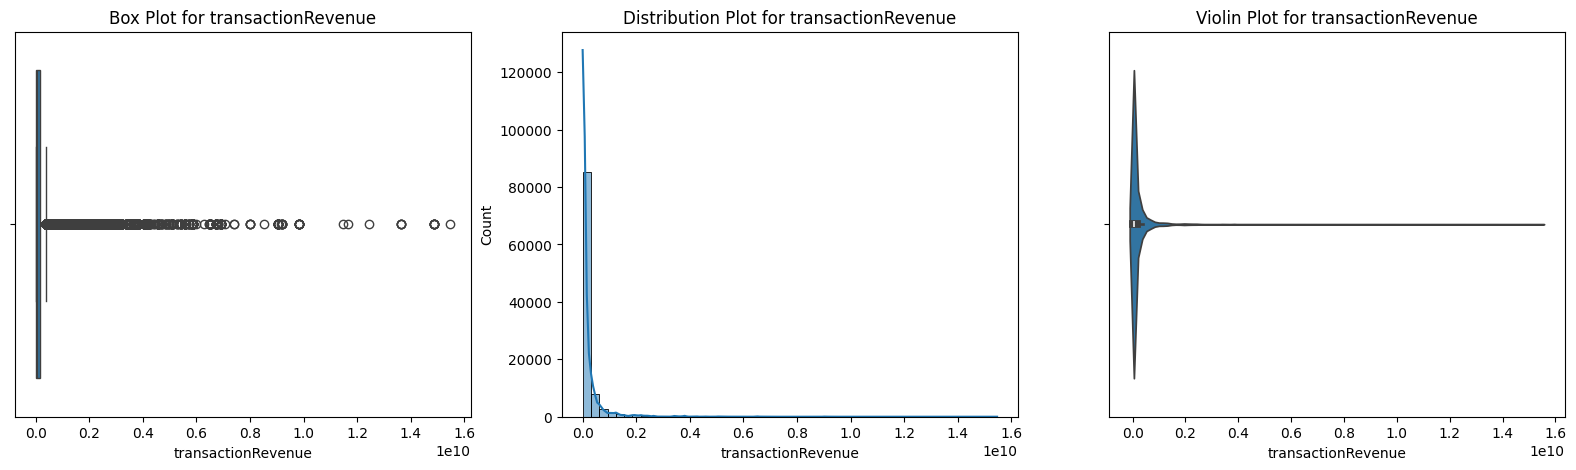

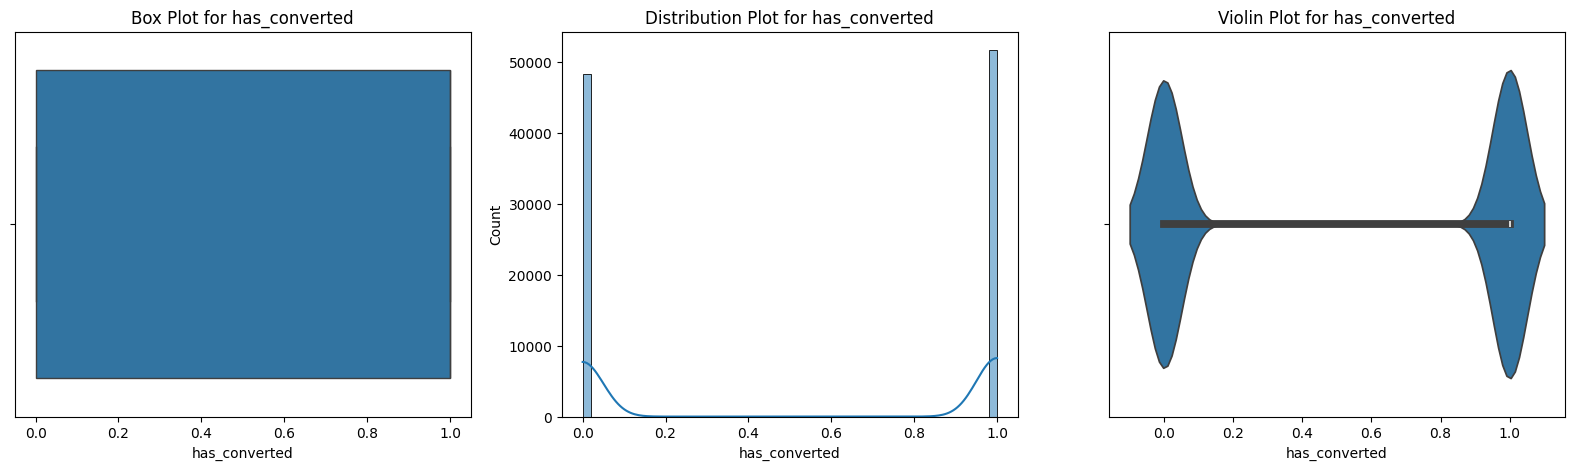

In [28]:
for i in ['count_session', 'count_hit', 'totals_newVisits',
       'device_isMobile','device_operatingSystem',
       'historic_session', 'historic_session_page', 'avg_session_time',
       'avg_session_time_page', 'single_page_rate', 'sessionQualityDim',
       'latest_visit_id', 'latest_visit_number', 'time_latest_visit',
       'avg_visit_time', 'visits_per_day', 'bounce_rate',
        'latest_isTrueDirect', 'bounces','num_interactions',
       'time_on_site', 'transactionRevenue', 
       'has_converted']:
    plot(data, i)

In [29]:
#SKEWNESS PERCENTAGE

In [30]:
from scipy.stats import skew

count_session
3.456929421959642


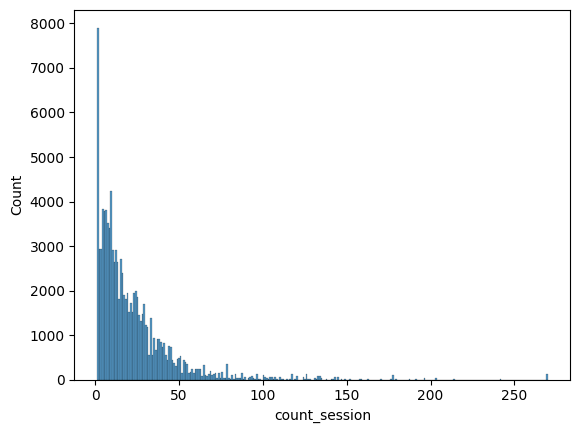

count_hit
4.012984007434104


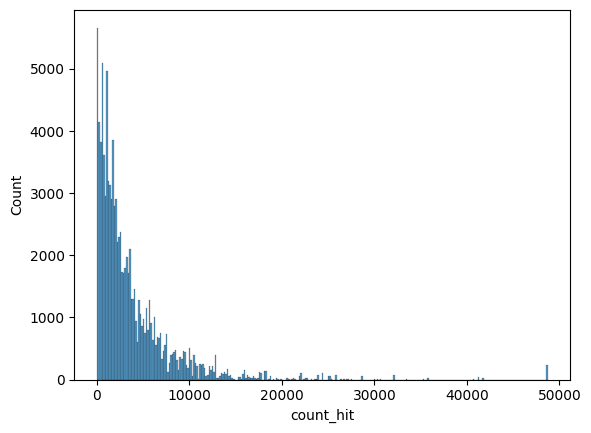

totals_newVisits
6.788852438356002


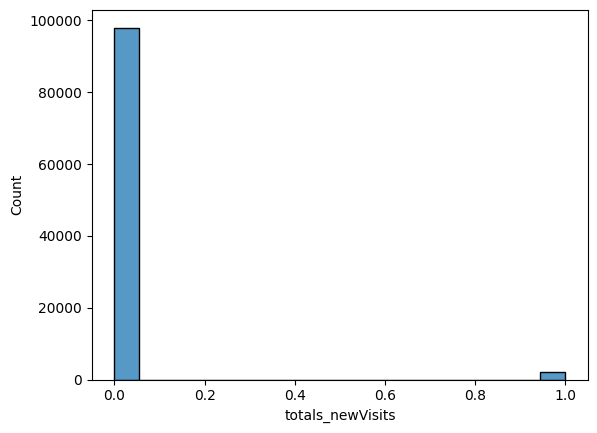

historic_session
5.0933556344744995


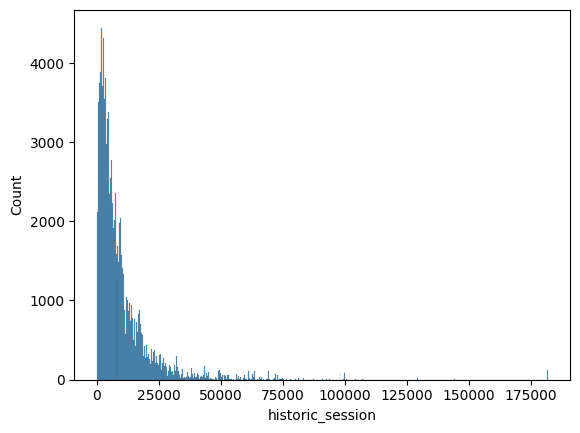

historic_session_page
8.803525975610503


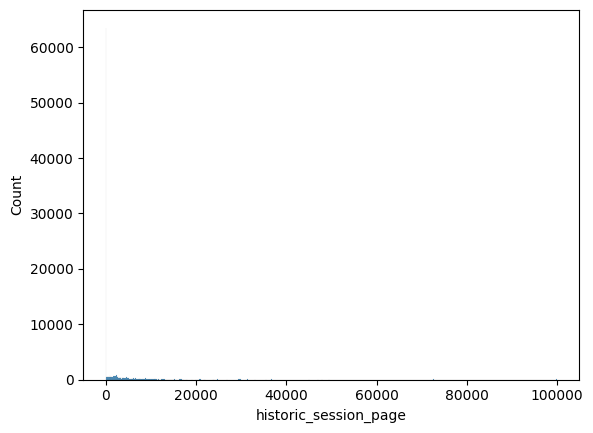

avg_session_time
3.301971872821448


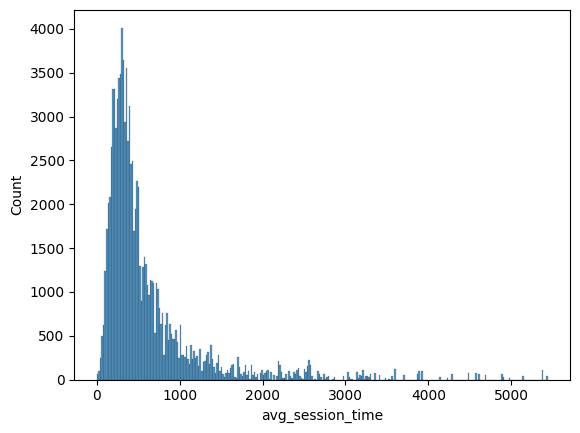

avg_session_time_page
4.055479649278259


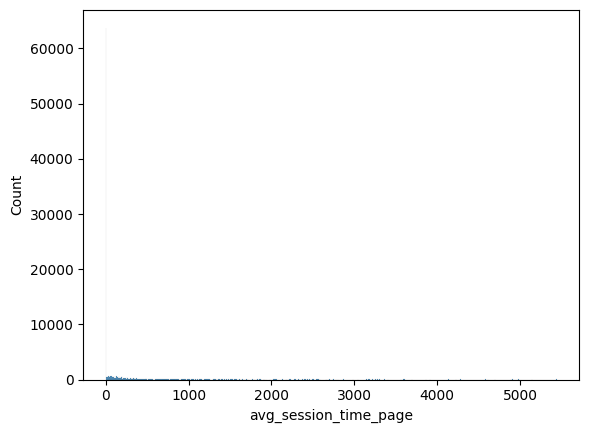

single_page_rate
-2.3694397233743465


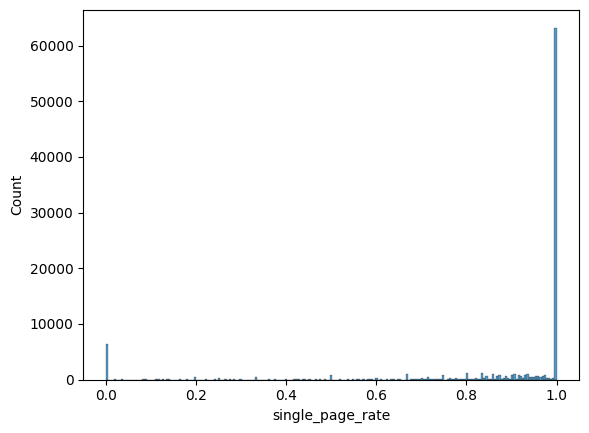

sessionQualityDim
1.258395989609916


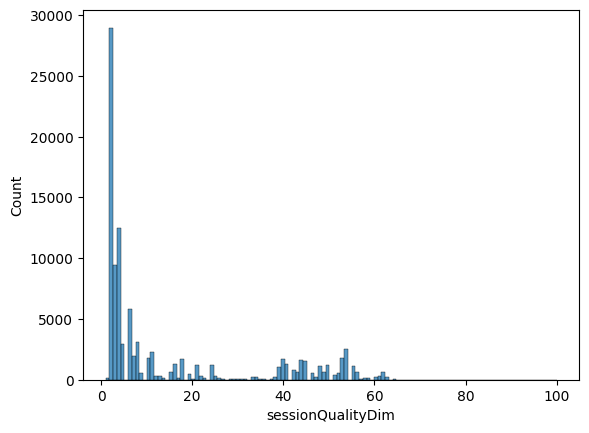

latest_visit_id
-3.7300959393194013


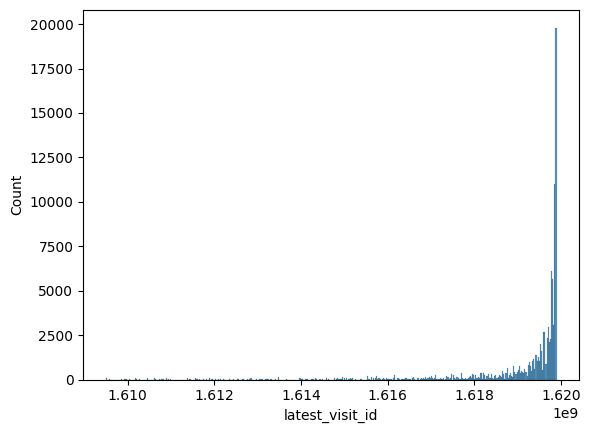

latest_visit_number
30.986371983004908


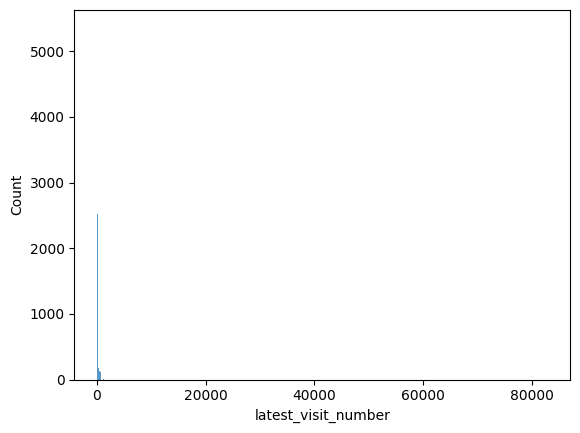

time_latest_visit
-0.24222972201683837


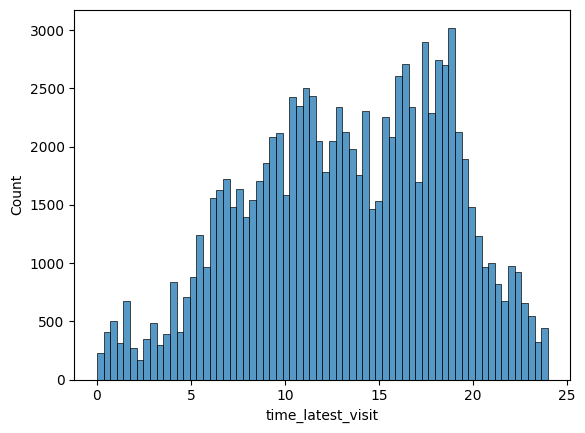

avg_visit_time
-0.0485321838496872


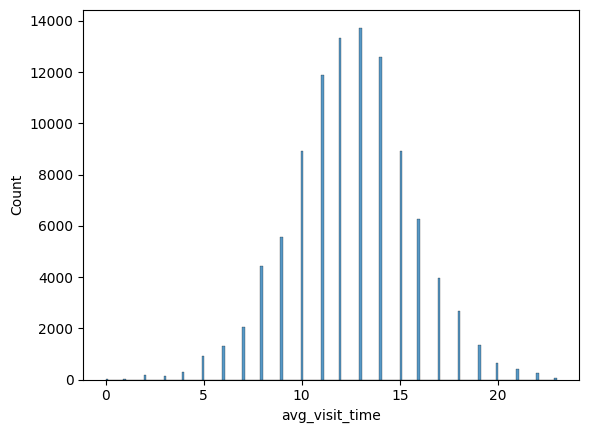

visits_per_day
4.170660891936582


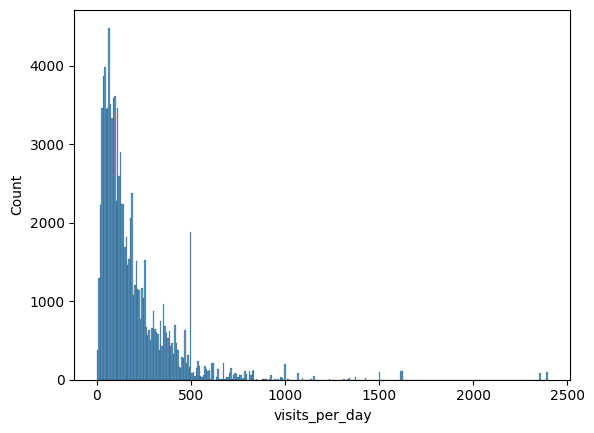

bounce_rate
19.890403205601345


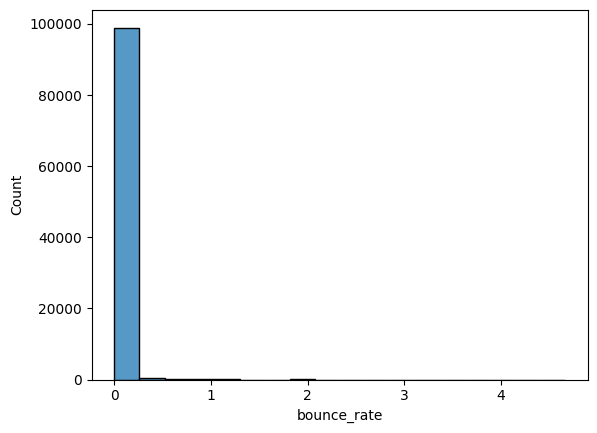

num_interactions
2.9377336617617567


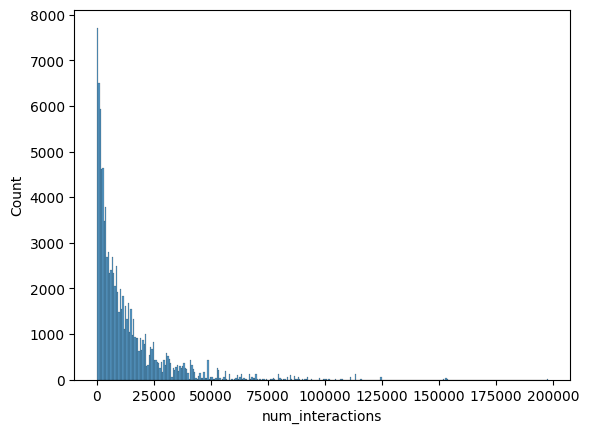

bounces
90.19342162317335


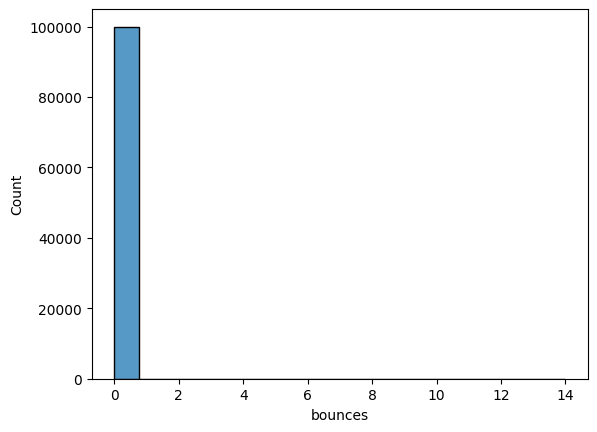

time_on_site
8.503108144405731


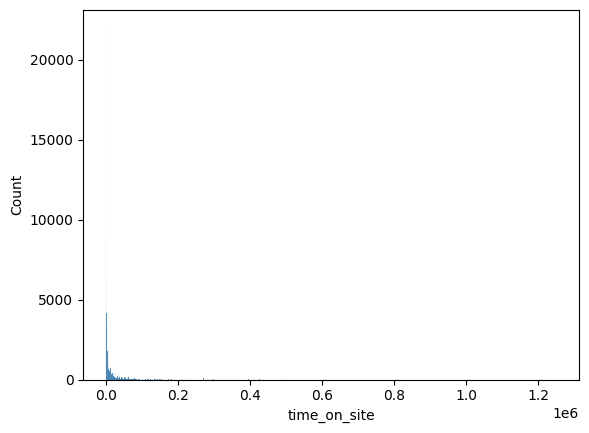

transactionRevenue
8.766746361622712


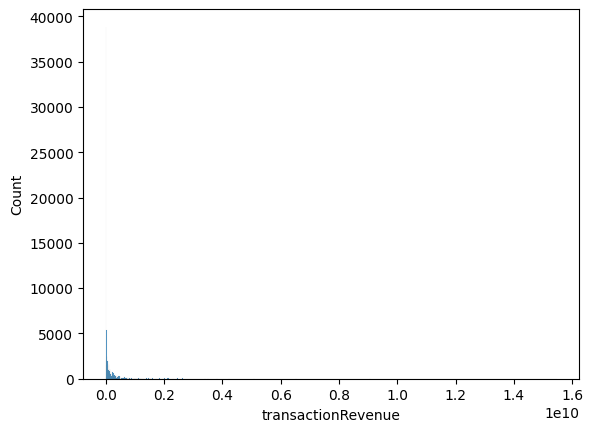

has_converted
-0.06912124352734


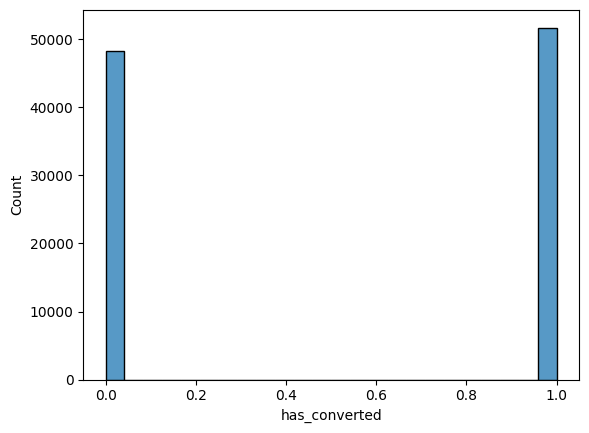

In [31]:
for col in data_num:
    print(col)
    print(skew(data_num[col]))
    plt.figure()
    sns.histplot(data_num[col])
    plt.show()

In [32]:
#CORRELATION BETWEEN COLUMNS(HEATMAP)

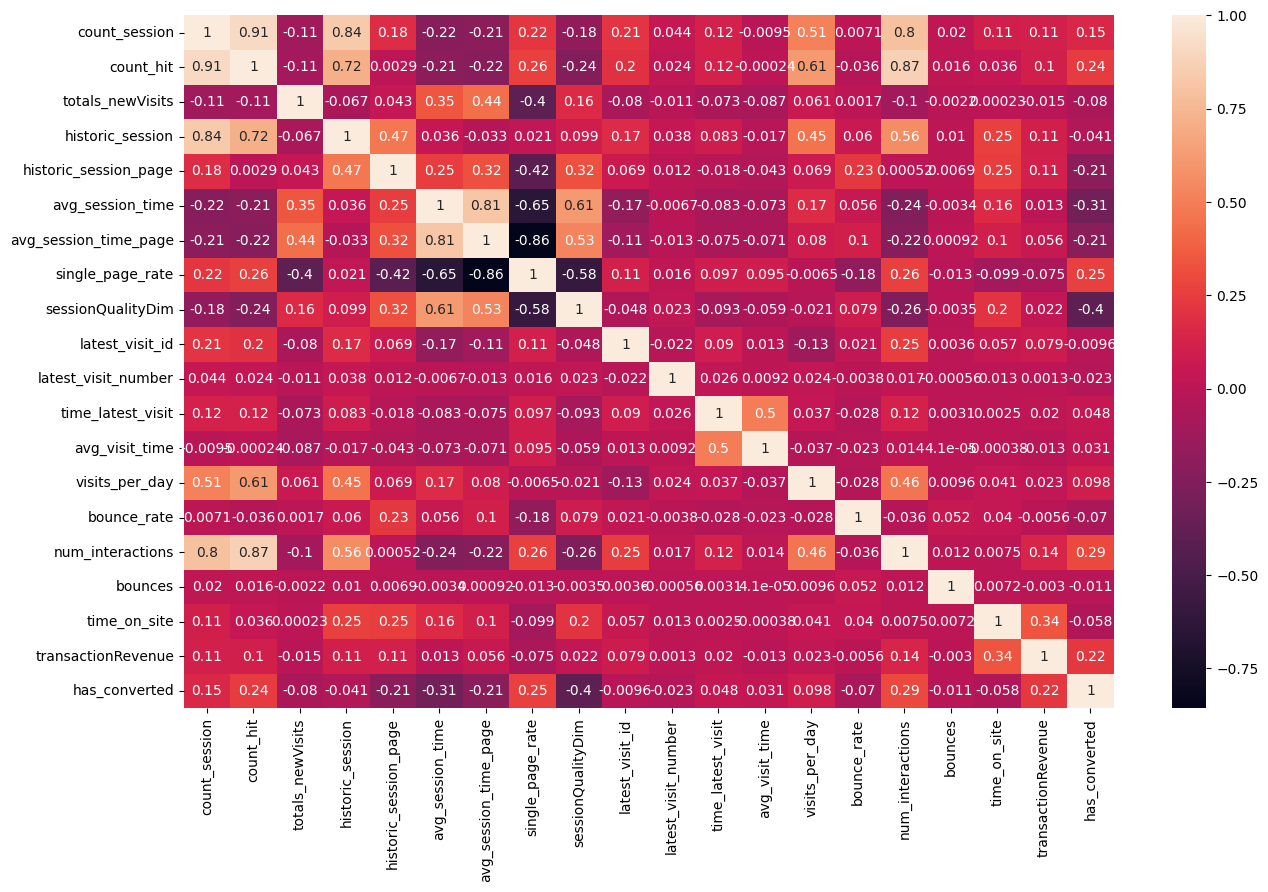

In [33]:
plt.figure(figsize = (15,9))
sns.heatmap(data_num.corr(),annot=True)
plt.show()

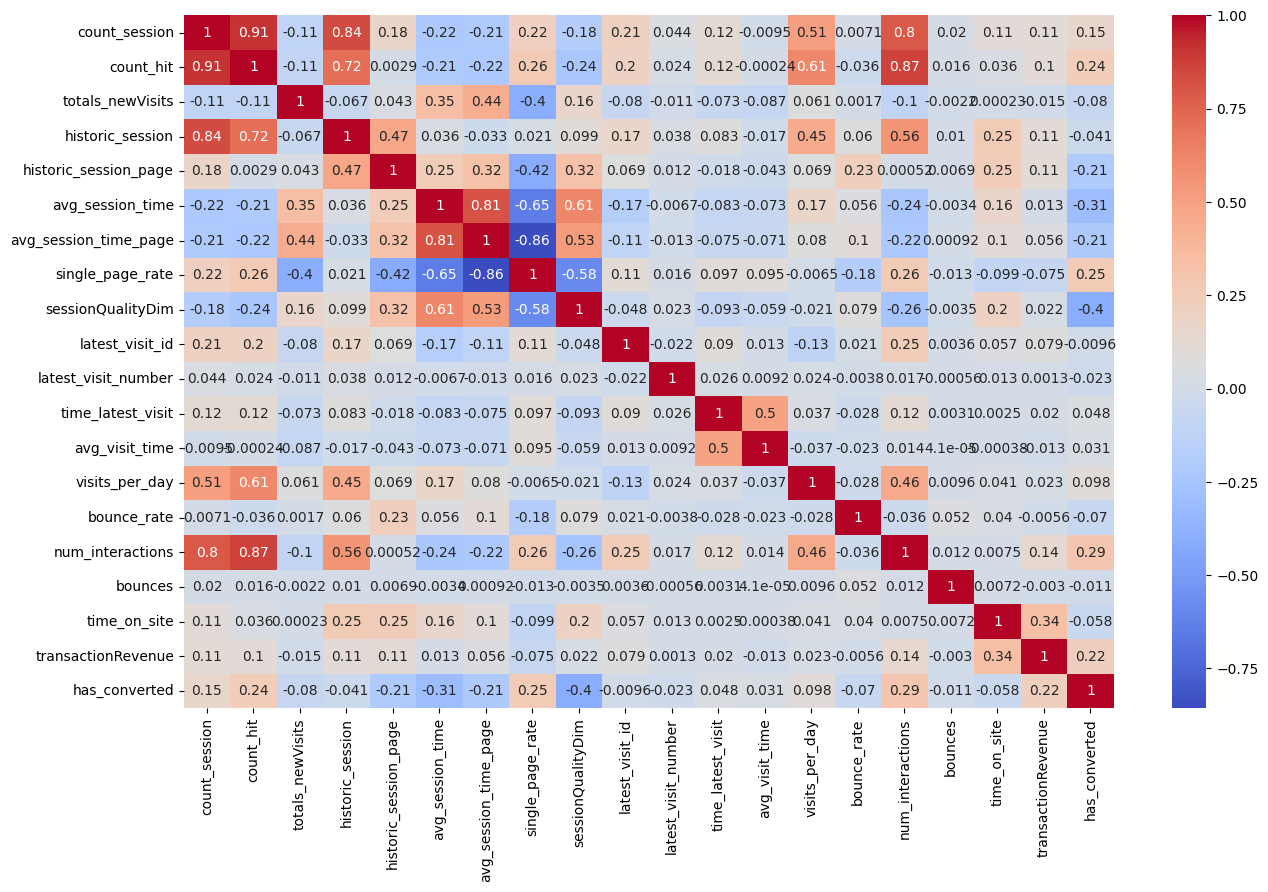

In [34]:
plt.figure(figsize = (15,9))
sns.heatmap(data_num.corr(),annot=True,cmap="coolwarm")
plt.show()

In [35]:
correlation_matrix = data_num.corr()

In [36]:
positive_correlations = correlation_matrix[correlation_matrix > 0]
positive_correlations

,count_session,count_hit,totals_newVisits,historic_session,historic_session_page,avg_session_time,avg_session_time_page,single_page_rate,sessionQualityDim,latest_visit_id,latest_visit_number,time_latest_visit,avg_visit_time,visits_per_day,bounce_rate,num_interactions,bounces,time_on_site,transactionRevenue,has_converted
count_session,1.000000,0.910768,NaN,0.839560,0.176914,NaN,NaN,0.223119,NaN,0.214684,0.043527,0.121367,NaN,0.509384,0.007130,0.795487,0.019882,0.106171,0.108758,0.154365
count_hit,0.910768,1.000000,NaN,0.716836,0.002928,NaN,NaN,0.260696,NaN,0.196538,0.023615,0.116598,NaN,0.612630,NaN,0.867587,0.016472,0.035518,0.101304,0.239196
totals_newVisits,NaN,NaN,1.000000,NaN,0.042629,0.345303,0.438296,NaN,0.159811,NaN,NaN,NaN,NaN,0.060557,0.001694,NaN,NaN,0.000230,NaN,NaN
historic_session,0.839560,0.716836,NaN,1.000000,0.472207,0.035841,NaN,0.021273,0.098993,0.171184,0.038450,0.083355,NaN,0.453436,0.060385,0.562461,0.010110,0.253631,0.106939,NaN
historic_session_page,0.176914,0.002928,0.042629,0.472207,1.000000,0.248529,0.324011,NaN,0.318808,0.068898,0.011571,NaN,NaN,0.069144,0.225330,0.000519,0.006895,0.252618,0.109510,NaN
avg_session_time,NaN,NaN,0.345303,0.035841,0.248529,1.000000,0.813846,NaN,0.611386,NaN,NaN,NaN,NaN,0.169948,0.055617,NaN,NaN,0.160019,0.012673,NaN
avg_session_time_page,NaN,NaN,0.438296,NaN,0.324011,0.813846,1.000000,NaN,0.528013,NaN,NaN,NaN,NaN,0.080027,0.102693,NaN,0.000918,0.104383,0.055591,NaN
single_page_rate,0.223119,0.260696,NaN,0.021273,NaN,NaN,NaN,1.000000,NaN,0.112640,0.016284,0.097131,0.094817,NaN,NaN,0.255281,NaN,NaN,NaN,0.253616
sessionQualityDim,NaN,NaN,0.159811,0.098993,0.318808,0.611386,0.528013,NaN,1.000000,NaN,0.023461,NaN,NaN,NaN,0.079122,NaN,NaN,0.204832,0.021805,NaN
latest_visit_id,0.214684,0.196538,NaN,0.171184,0.068898,NaN,NaN,0.112640,NaN,1.000000,NaN,0.089608,0.013342,NaN,0.020986,0.251200,0.003649,0.056662,0.078539,NaN


In [37]:
negative_correlations = correlation_matrix[correlation_matrix < 0]
negative_correlations

,count_session,count_hit,totals_newVisits,historic_session,historic_session_page,avg_session_time,avg_session_time_page,single_page_rate,sessionQualityDim,latest_visit_id,latest_visit_number,time_latest_visit,avg_visit_time,visits_per_day,bounce_rate,num_interactions,bounces,time_on_site,transactionRevenue,has_converted
count_session,NaN,NaN,-0.113955,NaN,NaN,-0.223344,-0.210169,NaN,-0.175014,NaN,NaN,NaN,-0.009469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_hit,NaN,NaN,-0.106085,NaN,NaN,-0.210763,-0.221032,NaN,-0.237133,NaN,NaN,NaN,-0.000244,NaN,-0.035866,NaN,NaN,NaN,NaN,NaN
totals_newVisits,-0.113955,-0.106085,NaN,-0.067059,NaN,NaN,NaN,-0.399994,NaN,-0.079953,-0.010981,-0.073082,-0.086527,NaN,NaN,-0.104045,-0.002166,NaN,-0.015101,-0.080474
historic_session,NaN,NaN,-0.067059,NaN,NaN,NaN,-0.033357,NaN,NaN,NaN,NaN,NaN,-0.017466,NaN,NaN,NaN,NaN,NaN,NaN,-0.040548
historic_session_page,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.415076,NaN,NaN,NaN,-0.017666,-0.042651,NaN,NaN,NaN,NaN,NaN,NaN,-0.206134
avg_session_time,-0.223344,-0.210763,NaN,NaN,NaN,NaN,NaN,-0.652510,NaN,-0.172367,-0.006697,-0.083341,-0.073089,NaN,NaN,-0.242807,-0.003382,NaN,NaN,-0.311591
avg_session_time_page,-0.210169,-0.221032,NaN,-0.033357,NaN,NaN,NaN,-0.856624,NaN,-0.112421,-0.012891,-0.074931,-0.071289,NaN,NaN,-0.220978,NaN,NaN,NaN,-0.212835
single_page_rate,NaN,NaN,-0.399994,NaN,-0.415076,-0.652510,-0.856624,NaN,-0.581893,NaN,NaN,NaN,NaN,-0.006456,-0.178882,NaN,-0.013354,-0.098525,-0.074602,NaN
sessionQualityDim,-0.175014,-0.237133,NaN,NaN,NaN,NaN,NaN,-0.581893,NaN,-0.048011,NaN,-0.092684,-0.059169,-0.021094,NaN,-0.260752,-0.003460,NaN,NaN,-0.403283
latest_visit_id,NaN,NaN,-0.079953,NaN,NaN,-0.172367,-0.112421,NaN,-0.048011,NaN,-0.021967,NaN,NaN,-0.127915,NaN,NaN,NaN,NaN,NaN,-0.009604


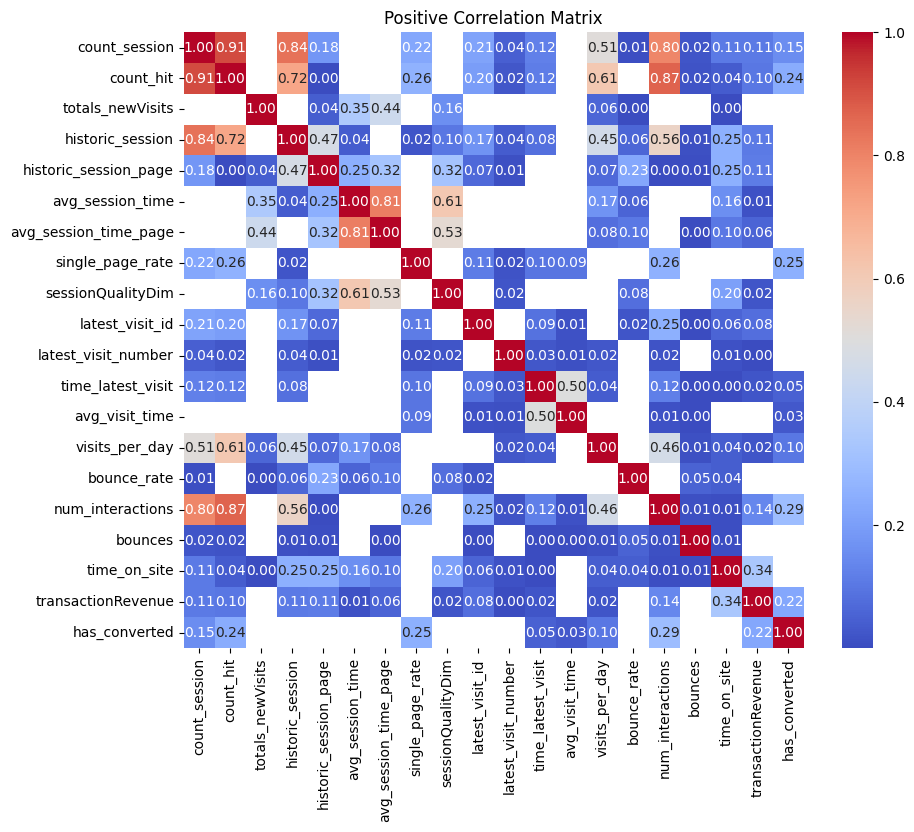

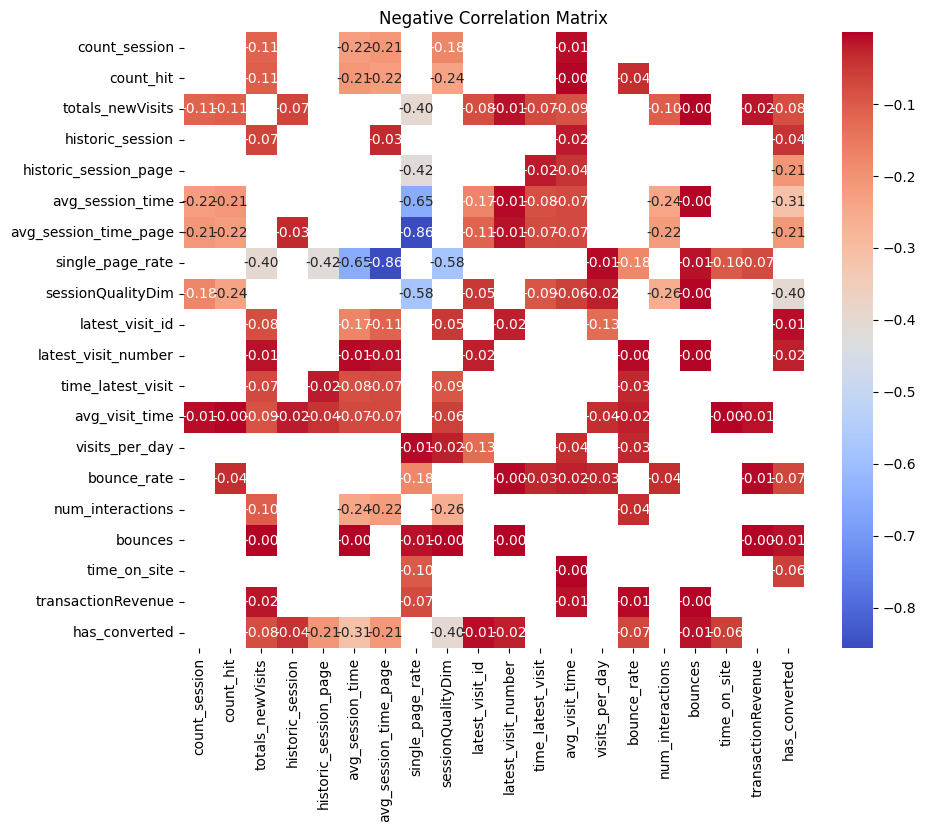

In [38]:
# Plot positive correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(positive_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Positive Correlation Matrix')
plt.show()

# Plot negative correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(negative_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Negative Correlation Matrix')
plt.show()

In [39]:
# Calculate Correlation with Target Variable:
correlation_with_target = data_num.corrwith(data_num['has_converted'])

In [40]:
# Sort Correlation Values:
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

In [41]:
# Select Top Features:
top_features = sorted_correlation.head()

In [42]:
correlation_matrix = data_num.drop('has_converted', axis=1).corr()

# Remove highly correlated features
high_correlation_threshold = 0.7  # Adjust threshold as needed
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
data.drop(correlated_features, axis=1, inplace=True)

In [43]:
selected_features = list(top_features.index)
selected_features

['has_converted',
 'sessionQualityDim',
 'avg_session_time',
 'num_interactions',
 'single_page_rate']

In [44]:
data_num.dtypes

count_session              int64
count_hit                  int64
totals_newVisits           int64
historic_session           int64
historic_session_page      int64
avg_session_time         float64
avg_session_time_page    float64
single_page_rate         float64
sessionQualityDim          int64
latest_visit_id            int64
latest_visit_number        int64
time_latest_visit        float64
avg_visit_time             int64
visits_per_day           float64
bounce_rate              float64
num_interactions           int64
bounces                    int64
time_on_site               int64
transactionRevenue         int64
has_converted              int64
dtype: object

# Handle Skewed Distribution

In [45]:
# use Square Transform for left skewed data and Log Transform for right skewed data

In [46]:

data_num["totals_newVisits"]=np.sqrt(data_num["totals_newVisits"])
data_num["historic_session"]=np.sqrt(data_num["historic_session"])
data_num["latest_visit_id"]=np.sqrt(data_num["latest_visit_id"])
data_num["bounces"]=np.sqrt(data_num["bounces" ])



In [47]:
print(skew(data_num["totals_newVisits"]),
skew(data_num["historic_session"]),
skew(data_num["latest_visit_id"]),
skew(data_num["bounces"]))


6.788852438356002 1.569532704132568 -3.7329215158672433 63.44781151442312


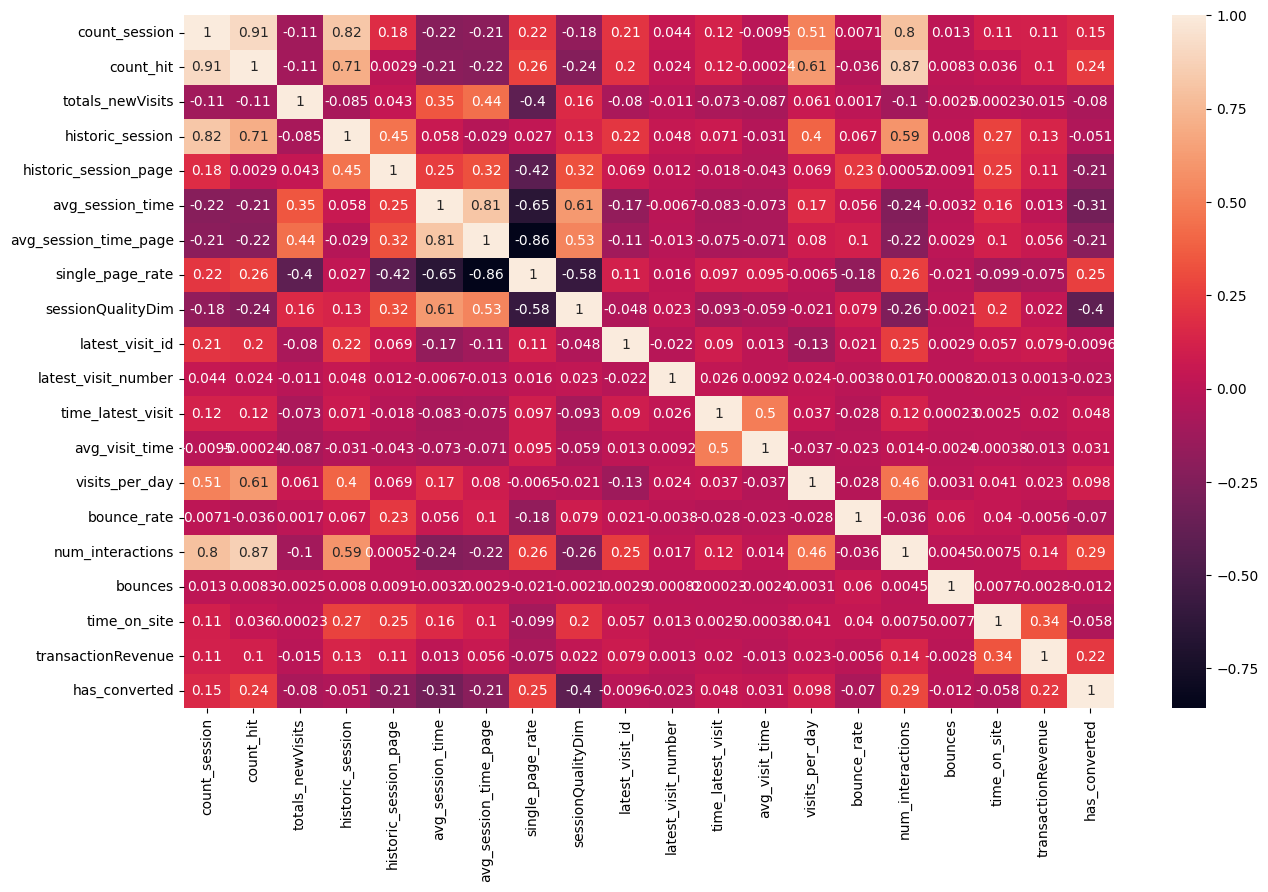

In [48]:
plt.figure(figsize = (15,9))
sns.heatmap(data_num.corr(),annot=True)
plt.show()

In [49]:
data=pd.concat([data_num,data_cat],axis=1)

In [50]:
data.columns

Index(['count_session', 'count_hit', 'totals_newVisits', 'historic_session',
       'historic_session_page', 'avg_session_time', 'avg_session_time_page',
       'single_page_rate', 'sessionQualityDim', 'latest_visit_id',
       'latest_visit_number', 'time_latest_visit', 'avg_visit_time',
       'visits_per_day', 'bounce_rate', 'num_interactions', 'bounces',
       'time_on_site', 'transactionRevenue', 'has_converted',
       'channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'latest_source',
       'latest_medium', 'latest_keyword', 'products_array'],
      dtype='object')

In [51]:
column_to_drop = ["count_session","historic_session_page","avg_session_time_page","sessionQualityDim","avg_session_time_page","bounce_rate",'latest_visit_number','products_array']

data_1=data.drop(column_to_drop, axis=1, inplace=True)

MODEL BUILD

In [52]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

ENCODING METHOD

In [53]:
#convert all of the non _numeric columns to numeric
for column in data.columns:
    if data[column].dtype== np.number:
        continue
    data[column]=LabelEncoder().fit_transform(data[column])

C:\Users\shali\AppData\Local\Temp\ipykernel_11468\1651882700.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype== np.number:
C:\Users\shali\AppData\Local\Temp\ipykernel_11468\1651882700.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype== np.number:
C:\Users\shali\AppData\Local\Temp\ipykernel_11468\1651882700.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype== np.number:
C:\Users\shali\AppData\Local\Temp\ipykernel_11468\1651882700.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dty

In [54]:
data.dtypes

count_hit                   int64
totals_newVisits          float64
historic_session          float64
avg_session_time          float64
single_page_rate          float64
latest_visit_id           float64
time_latest_visit         float64
avg_visit_time              int64
visits_per_day            float64
num_interactions            int64
bounces                   float64
time_on_site                int64
transactionRevenue          int64
has_converted               int64
channelGrouping             int32
device_browser              int32
device_operatingSystem      int32
device_deviceCategory       int32
geoNetwork_region           int32
latest_source               int32
latest_medium               int32
latest_keyword              int32
dtype: object

In [55]:
data

,count_hit,totals_newVisits,historic_session,avg_session_time,single_page_rate,latest_visit_id,time_latest_visit,avg_visit_time,visits_per_day,num_interactions,...,transactionRevenue,has_converted,channelGrouping,device_browser,device_operatingSystem,device_deviceCategory,geoNetwork_region,latest_source,latest_medium,latest_keyword
0,1147,0.0,80.647381,722.666667,0.777778,40246.860784,19.17,18,66.333333,1405,...,0,0,0,5,1,1,71,5,0,2
1,1147,0.0,80.647381,722.666667,0.777778,40246.860784,19.17,18,66.333333,1405,...,0,0,0,5,1,1,71,5,0,2
2,1673,0.0,111.651243,445.214286,0.821429,40247.577964,11.20,11,73.480000,2460,...,4525,1,2,5,1,1,2,4,1,1
3,294,0.0,39.686270,787.500000,1.000000,40223.049064,14.90,17,37.375000,448,...,0,0,2,5,1,1,1,4,1,96
4,294,0.0,39.686270,787.500000,1.000000,40223.049064,14.90,17,37.375000,448,...,0,0,2,5,1,1,1,4,1,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4315,0.0,167.576848,484.172414,1.000000,40246.624330,13.87,14,398.064516,6504,...,2715,1,2,5,6,1,25,4,1,96
99996,4315,0.0,167.576848,484.172414,1.000000,40246.624330,13.87,14,398.064516,6504,...,2715,1,2,5,6,1,25,4,1,96
99997,4315,0.0,167.576848,484.172414,1.000000,40246.624330,13.87,14,398.064516,6504,...,2715,1,2,5,6,1,25,4,1,96
99998,4315,0.0,167.576848,484.172414,1.000000,40246.624330,13.87,14,398.064516,6504,...,2715,1,2,5,6,1,25,4,1,96


In [56]:
#FEATURE SCALING 

In [57]:
#scaled the data
X=data.drop ("has_converted",axis=1)
y=data["has_converted"]
X=StandardScaler().fit_transform(X)

In [58]:
#split the data into 75% train and 25% test
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()

selector = RFE(estimator, n_features_to_select=5)

selector.fit(x_train, y_train)

print(selector.support_)
print(data.columns)

[False False False False  True  True False False False False False  True
  True False False  True False False False False False]
Index(['count_hit', 'totals_newVisits', 'historic_session', 'avg_session_time',
       'single_page_rate', 'latest_visit_id', 'time_latest_visit',
       'avg_visit_time', 'visits_per_day', 'num_interactions', 'bounces',
       'time_on_site', 'transactionRevenue', 'has_converted',
       'channelGrouping', 'device_browser', 'device_operatingSystem',
       'device_deviceCategory', 'geoNetwork_region', 'latest_source',
       'latest_medium', 'latest_keyword'],
      dtype='object')


LogisticRegression

In [60]:
#create the model
model=LogisticRegression()
#train the model
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
pre=model.predict(x_test)
print(pre)

[0 0 1 ... 1 0 0]


In [62]:
accuracy_score(y_test,pre)

0.8968

In [63]:
#check the precision, recall, f1_score
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      9693
           1       0.90      0.90      0.90     10307

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [64]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=pre)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.8967425909245205


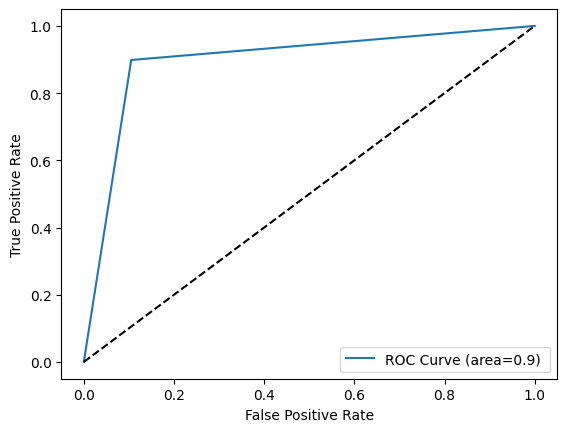

In [65]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold

# hypertuning parameter 

In [68]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [69]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.894725 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [70]:
from sklearn.neighbors import KNeighborsClassifier
log = LogisticRegression()
log_model = log.fit(x_train,y_train)
#Use the values for your confusion matrix
log_y_model = log_model.predict(X=x_test)
# Use the probabilities for your ROC and Precision-recall curves
log_y_proba = log_model.predict_proba(X=x_test)

In [71]:
log_y_model 

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [72]:
log_y_proba

array([[0.71270524, 0.28729476],
       [0.94886701, 0.05113299],
       [0.05506112, 0.94493888],
       ...,
       [0.05735196, 0.94264804],
       [0.96049316, 0.03950684],
       [0.68843361, 0.31156639]])

In [73]:
#confusion_matrix(LOG)

Text(0.5, 0, 'Predicted label')

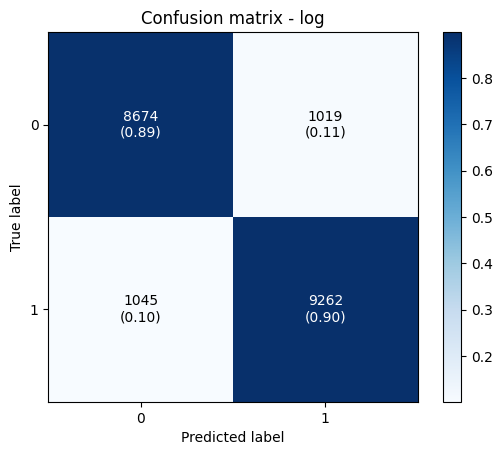

In [74]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,log_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - log")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'ROC Curves - Logistic')

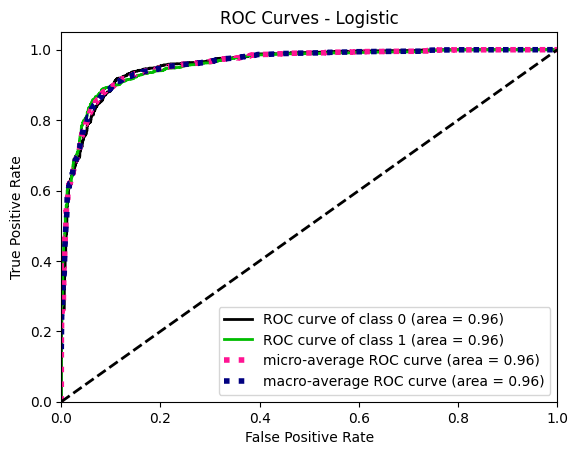

In [75]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, log_y_proba)
plt.title("ROC Curves - Logistic")

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
KNN=KNeighborsClassifier()
#train the model
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [124]:
y_pred3=KNN.predict(x_test)
print(y_pred3)

[1 0 1 ... 1 0 0]


In [125]:
precision_score(y_test,y_pred3)

0.9893575473540324

In [126]:
accuracy_score(y_test,y_pred3)

0.98585

In [127]:
recall_score(y_test,y_pred3)

0.9831182691374794

In [128]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9693
           1       0.99      0.98      0.99     10307

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
#Use the values for your confusion matrix
knn_y_model = knn_model.predict(X=x_test)
# Use the probabilities for your ROC and Precision-recall curves
knn_y_proba = knn_model.predict_proba(X=x_test)

In [77]:
knn_y_model 

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [78]:
knn_y_proba

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Text(0.5, 0, 'Predicted label')

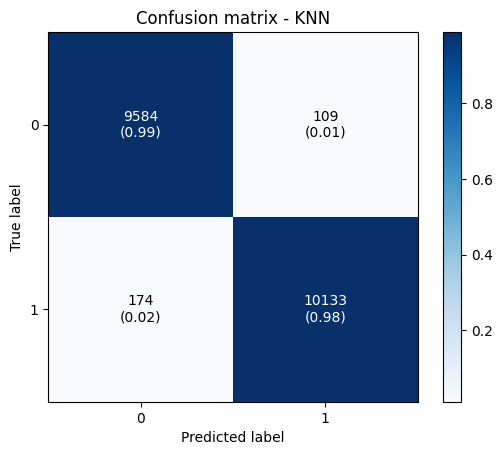

In [79]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,knn_y_model),
                                show_absolute=True,show_normed=True,colorbar=True)
plt.title("Confusion matrix - KNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

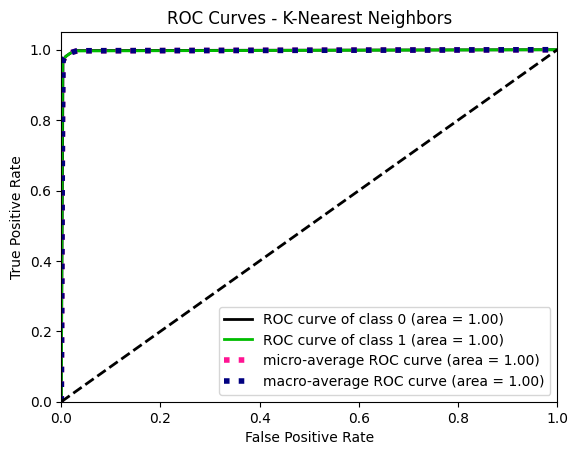

In [80]:
import scikitplot as skplt
plot = skplt.metrics.plot_roc(y_test, knn_y_proba)
plt.title("ROC Curves - K-Nearest Neighbors")

In [ ]:
pip install scikit-plot

In [ ]:
pip install mlxtend

# Random forest

In [83]:
#create the model
model_ran=RandomForestClassifier()
#train the model
model_ran.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
y_pred=model_ran.predict(x_test)
print(y_pred)

[1 0 1 ... 1 0 0]


In [121]:
accuracy_score(y_test,y_pred)

0.9974

In [119]:
precision_score(y_test,y_pred)

0.997573993207181

In [116]:
recall_score(y_test,y_pred)

0.9973804210730571

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9693
           1       1.00      1.00      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [89]:
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9974006201104478


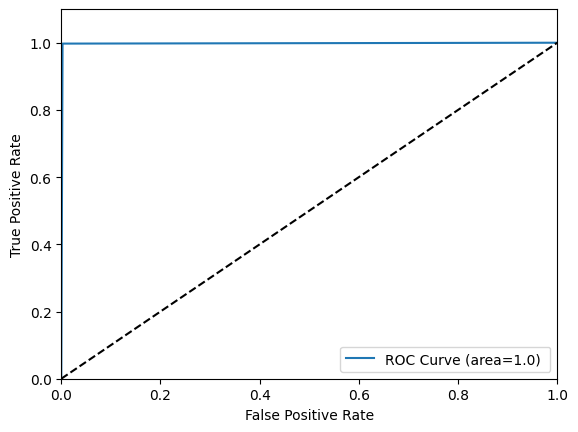

In [90]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [91]:
model_des=DecisionTreeClassifier()
#train the model
model_des.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred1=model_des.predict(x_test)
print(y_pred1)

[1 0 1 ... 1 0 0]


In [93]:
precision_score(y_test,y_pred1)

0.9964133385032958

In [94]:
accuracy_score(y_test,y_pred1)

0.99675

In [95]:
recall_score(y_test,y_pred1)

0.9972833996313185

In [96]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9693
           1       1.00      1.00      1.00     10307

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [97]:
from sklearn import svm

In [98]:
model_svm=svm.SVC()
#train the model
model_svm.fit(x_train,y_train)

SVC()

In [99]:
y_pred2=model_svm.predict(x_test)
print(y_pred2)

[1 0 1 ... 1 0 0]


In [100]:
precision_score(y_test,y_pred2)

0.9798836406666009

In [101]:
accuracy_score(y_test,y_pred2)

0.9713

In [102]:
recall_score(y_test,y_pred2)

0.964102066556709

In [103]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9693
           1       0.98      0.96      0.97     10307

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [111]:
user_data = np.array([[8,1147,0,0,1,1,71,3619,555,722.6666675,2877,0,8,5,4,8,9,1,0,1,1]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('has_converted')
else:
    print('not_converted')

has_converted


In [150]:
user_data = np.array([[1147,0.0,80.647381,722.666667,0.777778,40246.860784,19.17,18,66.333333,1405,0,0,0,0,	5,1,1,71,5,0,2]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('has_converted')
else:
    print('not_converted')

not_converted


In [113]:
# save model 
import pickle


In [114]:
# Save the model using pickle
with open("class model.pkl", "wb") as file:
    pickle.dump(model, file)

In [115]:
# Load the saved model
with open("class model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
predictions = loaded_model.predict(x_test)

# Evaluate the loaded model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the loaded model: {accuracy}")


Accuracy of the loaded model: 0.8968
